# Lambda-Kaggle Tanzania Waterpoints Challenge

My initial imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


Create DataFrames

In [3]:
df_train = pd.read_csv('train_features.csv')
df_test = pd.read_csv('test_features.csv')

In [4]:
df_train.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'population', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'construction_year', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group'], dtype='object')

In [5]:
df_train.shape

(59400, 40)

In [6]:
df_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [7]:
df_test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [8]:
print(df_train.shape)
print(df_test.shape)

(59400, 40)
(14358, 40)


### Putting together both the training and test set so I can preprocess them, and then split them out later 
### using the below method of adding a training-set column to both DataFrames with True/False to tell them apart

In [9]:

df_train['training_set'] = True
df_test['training_set'] = False

In [10]:
df_full = pd.concat([df_train, df_test])
df_full.shape

(73758, 41)

In [11]:
df_full.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,training_set
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,True
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,True
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,True
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,True
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,True


### First thing we're going to do is create an age variable by:
1. changing ```date_recorded``` to datetime variable
2. extracting just the year
3. subtracting ```construction_year``` from ```year_recorded```

In [12]:
df_full['date_recorded'] = pd.to_datetime(df_full['date_recorded'])
df_full.dtypes

id                                int64
amount_tsh                      float64
date_recorded            datetime64[ns]
funder                           object
gps_height                        int64
installer                        object
longitude                       float64
latitude                        float64
wpt_name                         object
num_private                       int64
basin                            object
subvillage                       object
region                           object
region_code                       int64
district_code                     int64
lga                              object
ward                             object
population                        int64
public_meeting                   object
recorded_by                      object
scheme_management                object
scheme_name                      object
permit                           object
construction_year                 int64
extraction_type                  object


In [13]:
df_full['date_recorded'] = df_full['date_recorded'].dt.year
df_full.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,training_set
0,69572,6000.0,2011,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,True
1,8776,0.0,2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,True
2,34310,25.0,2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,True
3,67743,0.0,2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,True
4,19728,0.0,2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,True


In [14]:
df_full['construction_year'] = df_full['construction_year'].replace(0, 1986)
df_full['construction_year'].value_counts(normalize=True)

1986    0.356382
2010    0.044660
2008    0.043792
2009    0.043100
2000    0.034762
2007    0.026343
2006    0.025529
2011    0.021340
2003    0.021272
2004    0.019022
2002    0.018154
2012    0.018018
1995    0.017354
2005    0.017218
1978    0.017178
1999    0.016568
1985    0.015903
1998    0.015876
1990    0.015836
1996    0.013802
1980    0.013517
1984    0.013083
1994    0.012717
1982    0.012500
1972    0.012039
1997    0.011104
1974    0.010968
1992    0.010887
1993    0.010033
2001    0.009192
1988    0.008908
1983    0.008053
1975    0.007606
1976    0.007118
1970    0.006670
1991    0.005504
1989    0.005369
1987    0.005016
1981    0.003837
1977    0.003335
1979    0.003295
1973    0.003010
2013    0.002820
1971    0.002400
1960    0.001681
1963    0.001451
1967    0.001437
1968    0.001261
1969    0.001030
1964    0.000651
1962    0.000475
1961    0.000380
1965    0.000285
1966    0.000258
Name: construction_year, dtype: float64

In [15]:
df_full['age'] = np.abs(df_full['date_recorded'] - df_full['construction_year'])
df_full.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,training_set,age
0,69572,6000.0,2011,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,True,12
1,8776,0.0,2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,True,3
2,34310,25.0,2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,True,4
3,67743,0.0,2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,True,27
4,19728,0.0,2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,1986,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,True,25


### 'population' is not normally distributed, so we take it's natrual-logarithm

In [16]:
df_full['population'] = df_full['population'].replace(0, 1)
df_full['population_logged'] = np.log(df_full['population'])
df_full['population_logged'].describe()

count    73758.000000
mean         2.731700
std          2.736432
min          0.000000
25%          0.000000
50%          3.218876
75%          5.379897
max         10.325482
Name: population_logged, dtype: float64

In [17]:
amount_tsh_encoded = []

for row in df_full['amount_tsh']:
    if row == 0:
        amount_tsh_encoded.append(0)
    else:
        amount_tsh_encoded.append(1)
        
df_full['amount_tsh_encoded'] = amount_tsh_encoded
df_full.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,training_set,age,population_logged,amount_tsh_encoded
0,69572,6000.0,2011,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,True,12,4.691348,1
1,8776,0.0,2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,True,3,5.634790,0
2,34310,25.0,2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,True,4,5.521461,1
3,67743,0.0,2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,True,27,4.060443,0
4,19728,0.0,2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,1,True,GeoData Consultants Ltd,NaN,NaN,True,1986,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,True,25,0.000000,0


### Drop unecessary numerical variables

In [18]:
df_full.drop(['date_recorded', 'construction_year', 'population',
             'amount_tsh', 'num_private'], axis=1, inplace=True)
df_full.head()

,id,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,training_set,age,population_logged,amount_tsh_encoded
0,69572,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,True,GeoData Consultants Ltd,VWC,Roman,False,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,True,12,4.691348,1
1,8776,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,NaN,GeoData Consultants Ltd,Other,NaN,True,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,True,3,5.634790,0
2,34310,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,True,4,5.521461,1
3,67743,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,True,GeoData Consultants Ltd,VWC,NaN,True,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,True,27,4.060443,0
4,19728,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,True,GeoData Consultants Ltd,NaN,NaN,True,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,True,25,0.000000,0


### Now we're going to work on just the categorical variables.  For most of the categorical features, we're going to take the extreme simplifying step of turning them into binary variables (1/0) since a lot of them contain one category that dominates, with the rest making up only a small fraction of the total...in essence a long-tail distribution.

In [19]:
df_full['funder'] = df_full['funder'].fillna(df_full['funder'].mode()[0])
df_full['subvillage'] = df_full['subvillage'].fillna(df_full['subvillage'].mode()[0])
df_full['public_meeting'] = df_full['public_meeting'].fillna(df_full['public_meeting'].mode()[0])
df_full['permit'].fillna(df_full['permit'].describe().top, inplace=True)

In [20]:
df_full.isna().sum()

id                           0
funder                       0
gps_height                   0
installer                 4443
longitude                    0
latitude                     0
wpt_name                     0
basin                        0
subvillage                   0
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
public_meeting               0
recorded_by                  0
scheme_management         4816
scheme_name              35005
permit                       0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity                     0
quantity_group               0
source                       0
source_type                  0
source_c

In [21]:
funder_cleaned = []

for row in df_full['funder']:
    if row == 'Government Of Tanzania':
        funder_cleaned.append('Tanzania')
    else:
        funder_cleaned.append('Other')
        
df_full['funder_cleaned'] = funder_cleaned

In [22]:
installer_cleaned = []

for row in df_full['installer']:
    if row == 'DWE':
        installer_cleaned.append('DWE')
    else:
        installer_cleaned.append('Other')
        
df_full['installer_cleaned'] = installer_cleaned

In [23]:
scheme_management_cleaned = []

for row in df_full['scheme_management']:
    if row == 'VWC':
        scheme_management_cleaned.append('VWC')
    else:
        scheme_management_cleaned.append('Other')
        
df_full['scheme_management_cleaned'] = scheme_management_cleaned

In [24]:
extraction_type_cleaned = []

for row in df_full['extraction_type']:
    if row == 'gravity':
        extraction_type_cleaned.append('gravity')
    else:
        extraction_type_cleaned.append('other')
    
df_full['extraction_type_cleaned'] = extraction_type_cleaned

In [25]:
management_cleaned = []

for row in df_full['management']:
    if row == 'vwc':
        management_cleaned.append('vwc')
    else:
        management_cleaned.append('other')
    
df_full['management_cleaned'] = management_cleaned

In [26]:
management_group_cleaned = []

for row in df_full['management_group']:
    if row == 'user-group':
        management_group_cleaned.append('user-group')
    else:
        management_group_cleaned.append('other')
        
df_full['management_group_cleaned'] = management_group_cleaned

In [27]:
payment_cleaned = []

for row in df_full['payment']:
    if row == 'never pay':
        payment_cleaned.append('never pay')
    else:
        payment_cleaned.append('other')
        
df_full['payment_cleaned'] = payment_cleaned

In [28]:
water_quality_cleaned = []

for row in df_full['water_quality']:
    if row == 'soft':
        water_quality_cleaned.append('soft')
    else:
        water_quality_cleaned.append('other')
        
df_full['water_quality_cleaned'] = water_quality_cleaned

In [29]:
quality_group_cleaned = []

for row in df_full['quality_group']:
    if row == 'good':
        quality_group_cleaned.append('good')
    else:
        quality_group_cleaned.append('other')
        
df_full['quality_group_cleaned'] = quality_group_cleaned

In [30]:
quantity_cleaned = []

for row in df_full['quantity']:
    if row == 'enough':
        quantity_cleaned.append('enough')
    else:
        quantity_cleaned.append('other')
        
df_full['quantity_cleaned'] = quantity_cleaned

In [31]:
source_cleaned = []

for row in df_full['source']:
    if row == 'spring':
        source_cleaned.append('spring')
    elif row == 'shallow well':
        source_cleaned.append('shallow well')
    elif row == 'machine dbh':
        source_cleaned.append('machine dbh')
    else:
        source_cleaned.append('other')
        
df_full['source_cleaned'] = source_cleaned

In [32]:
source_class_cleaned = []

for row in df_full['source_class']:
    if row == 'groundwater':
        source_class_cleaned.append('groundwater')
    else:
        source_class_cleaned.append('surface')
        
df_full['source_class_cleaned'] = source_class_cleaned

In [33]:
waterpoint_type_cleaned = []

for row in df_full['waterpoint_type']:
    if ((row == 'communal standpipe') or (row == 'communal standpipe multiple')):
        waterpoint_type_cleaned.append('standpipe')
    elif row == 'hand pump':
        waterpoint_type_cleaned.append('handpump')
    else:
        waterpoint_type_cleaned.append('other')
        
df_full['waterpoint_type_cleaned'] = waterpoint_type_cleaned      

### Dropping the 'old' categorical features that were transformed

In [34]:
drop_list = ['wpt_name', 'basin', 'subvillage', 'funder',
             'installer', 'scheme_management', 'permit', 'public_meeting',
             'lga', 'ward', 'recorded_by', 'region', 'scheme_name', 'extraction_type',
             'extraction_type_group', 'extraction_type_class', 'management',
             'management_group','payment', 'payment_type', 'water_quality',
             'quality_group', 'quantity', 'quantity_group','source', 'source_class',
             'source_type', 'waterpoint_type', 'waterpoint_type_group']

df_full.drop(drop_list, axis=1, inplace=True)
df_full.head()

,id,gps_height,longitude,latitude,region_code,district_code,training_set,age,population_logged,amount_tsh_encoded,funder_cleaned,installer_cleaned,scheme_management_cleaned,extraction_type_cleaned,management_cleaned,management_group_cleaned,payment_cleaned,water_quality_cleaned,quality_group_cleaned,quantity_cleaned,source_cleaned,source_class_cleaned,waterpoint_type_cleaned
0,69572,1390,34.938093,-9.856322,11,5,True,12,4.691348,1,Other,Other,VWC,gravity,vwc,user-group,other,soft,good,enough,spring,groundwater,standpipe
1,8776,1399,34.698766,-2.147466,20,2,True,3,5.634790,0,Other,Other,Other,gravity,other,user-group,never pay,soft,good,other,other,surface,standpipe
2,34310,686,37.460664,-3.821329,21,4,True,4,5.521461,1,Other,Other,VWC,gravity,vwc,user-group,other,soft,good,enough,other,surface,standpipe
3,67743,263,38.486161,-11.155298,90,63,True,27,4.060443,0,Other,Other,VWC,other,vwc,user-group,never pay,soft,good,other,machine dbh,groundwater,standpipe
4,19728,0,31.130847,-1.825359,18,1,True,25,0.000000,0,Other,Other,Other,gravity,other,other,never pay,soft,good,other,other,surface,standpipe


In [35]:
df_full.isna().sum()

id                           0
gps_height                   0
longitude                    0
latitude                     0
region_code                  0
district_code                0
training_set                 0
age                          0
population_logged            0
amount_tsh_encoded           0
funder_cleaned               0
installer_cleaned            0
scheme_management_cleaned    0
extraction_type_cleaned      0
management_cleaned           0
management_group_cleaned     0
payment_cleaned              0
water_quality_cleaned        0
quality_group_cleaned        0
quantity_cleaned             0
source_cleaned               0
source_class_cleaned         0
waterpoint_type_cleaned      0
dtype: int64

In [36]:
df_full.dtypes

id                             int64
gps_height                     int64
longitude                    float64
latitude                     float64
region_code                    int64
district_code                  int64
training_set                    bool
age                            int64
population_logged            float64
amount_tsh_encoded             int64
funder_cleaned                object
installer_cleaned             object
scheme_management_cleaned     object
extraction_type_cleaned       object
management_cleaned            object
management_group_cleaned      object
payment_cleaned               object
water_quality_cleaned         object
quality_group_cleaned         object
quantity_cleaned              object
source_cleaned                object
source_class_cleaned          object
waterpoint_type_cleaned       object
dtype: object

### Here we apply ```pd.get_dummies()``` to create dummy variables out of the categorical features:

In [37]:
dummy_columns=['funder_cleaned', 'installer_cleaned', 'scheme_management_cleaned', 'extraction_type_cleaned',
        'management_cleaned', 'management_group_cleaned', 'payment_cleaned', 'water_quality_cleaned',
        'quality_group_cleaned', 'quantity_cleaned', 'source_cleaned', 'source_class_cleaned',
        'waterpoint_type_cleaned']

### There's a total of 39 Features including 'id' after dummifying the DataFrame.  The important thing to remember is that we ran ```pd.get_dummies()``` on the whole dataset including training and testing data, so there's no mixup later when we split the data.

In [38]:
print("Original Features:\n", list(df_full.columns), "\n")
df_full_dummies = pd.get_dummies(df_full, columns=dummy_columns)
print("Features after get_dummies: \n", list(df_full_dummies.columns))

Original Features:
 ['id', 'gps_height', 'longitude', 'latitude', 'region_code', 'district_code', 'training_set', 'age', 'population_logged', 'amount_tsh_encoded', 'funder_cleaned', 'installer_cleaned', 'scheme_management_cleaned', 'extraction_type_cleaned', 'management_cleaned', 'management_group_cleaned', 'payment_cleaned', 'water_quality_cleaned', 'quality_group_cleaned', 'quantity_cleaned', 'source_cleaned', 'source_class_cleaned', 'waterpoint_type_cleaned'] 

Features after get_dummies: 
 ['id', 'gps_height', 'longitude', 'latitude', 'region_code', 'district_code', 'training_set', 'age', 'population_logged', 'amount_tsh_encoded', 'funder_cleaned_Other', 'funder_cleaned_Tanzania', 'installer_cleaned_DWE', 'installer_cleaned_Other', 'scheme_management_cleaned_Other', 'scheme_management_cleaned_VWC', 'extraction_type_cleaned_gravity', 'extraction_type_cleaned_other', 'management_cleaned_other', 'management_cleaned_vwc', 'management_group_cleaned_other', 'management_group_cleaned_user

In [39]:
df_full_dummies.head()

,id,gps_height,longitude,latitude,region_code,district_code,training_set,age,population_logged,amount_tsh_encoded,funder_cleaned_Other,funder_cleaned_Tanzania,installer_cleaned_DWE,installer_cleaned_Other,scheme_management_cleaned_Other,scheme_management_cleaned_VWC,extraction_type_cleaned_gravity,extraction_type_cleaned_other,management_cleaned_other,management_cleaned_vwc,management_group_cleaned_other,management_group_cleaned_user-group,payment_cleaned_never pay,payment_cleaned_other,water_quality_cleaned_other,water_quality_cleaned_soft,quality_group_cleaned_good,quality_group_cleaned_other,quantity_cleaned_enough,quantity_cleaned_other,source_cleaned_machine dbh,source_cleaned_other,source_cleaned_shallow well,source_cleaned_spring,source_class_cleaned_groundwater,source_class_cleaned_surface,waterpoint_type_cleaned_handpump,waterpoint_type_cleaned_other,waterpoint_type_cleaned_standpipe
0,69572,1390,34.938093,-9.856322,11,5,True,12,4.691348,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
1,8776,1399,34.698766,-2.147466,20,2,True,3,5.634790,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1
2,34310,686,37.460664,-3.821329,21,4,True,4,5.521461,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1
3,67743,263,38.486161,-11.155298,90,63,True,27,4.060443,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1
4,19728,0,31.130847,-1.825359,18,1,True,25,0.000000,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1


### Now that the data has been preprocessed, let's separate out the training and the test sets using the 'training_set' boolean column we created earlier.  And then we can train models on the training set and make predictions on the test set.

In [40]:
df_train = df_full_dummies[df_full_dummies['training_set'] == True]
df_train = df_train.drop('training_set', axis=1)

df_test = df_full_dummies[df_full_dummies['training_set'] == False]
df_test = df_test.drop('training_set', axis=1)


In [41]:
df_train.head()

,id,gps_height,longitude,latitude,region_code,district_code,age,population_logged,amount_tsh_encoded,funder_cleaned_Other,funder_cleaned_Tanzania,installer_cleaned_DWE,installer_cleaned_Other,scheme_management_cleaned_Other,scheme_management_cleaned_VWC,extraction_type_cleaned_gravity,extraction_type_cleaned_other,management_cleaned_other,management_cleaned_vwc,management_group_cleaned_other,management_group_cleaned_user-group,payment_cleaned_never pay,payment_cleaned_other,water_quality_cleaned_other,water_quality_cleaned_soft,quality_group_cleaned_good,quality_group_cleaned_other,quantity_cleaned_enough,quantity_cleaned_other,source_cleaned_machine dbh,source_cleaned_other,source_cleaned_shallow well,source_cleaned_spring,source_class_cleaned_groundwater,source_class_cleaned_surface,waterpoint_type_cleaned_handpump,waterpoint_type_cleaned_other,waterpoint_type_cleaned_standpipe
0,69572,1390,34.938093,-9.856322,11,5,12,4.691348,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
1,8776,1399,34.698766,-2.147466,20,2,3,5.634790,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1
2,34310,686,37.460664,-3.821329,21,4,4,5.521461,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1
3,67743,263,38.486161,-11.155298,90,63,27,4.060443,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1
4,19728,0,31.130847,-1.825359,18,1,25,0.000000,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1


In [42]:
df_test.head()

,id,gps_height,longitude,latitude,region_code,district_code,age,population_logged,amount_tsh_encoded,funder_cleaned_Other,funder_cleaned_Tanzania,installer_cleaned_DWE,installer_cleaned_Other,scheme_management_cleaned_Other,scheme_management_cleaned_VWC,extraction_type_cleaned_gravity,extraction_type_cleaned_other,management_cleaned_other,management_cleaned_vwc,management_group_cleaned_other,management_group_cleaned_user-group,payment_cleaned_never pay,payment_cleaned_other,water_quality_cleaned_other,water_quality_cleaned_soft,quality_group_cleaned_good,quality_group_cleaned_other,quantity_cleaned_enough,quantity_cleaned_other,source_cleaned_machine dbh,source_cleaned_other,source_cleaned_shallow well,source_cleaned_spring,source_class_cleaned_groundwater,source_class_cleaned_surface,waterpoint_type_cleaned_handpump,waterpoint_type_cleaned_other,waterpoint_type_cleaned_standpipe
0,50785,1996,35.290799,-4.059696,21,3,1,5.771441,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0
1,51630,1569,36.656709,-3.309214,2,2,13,5.703782,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1
2,17168,1567,34.767863,-5.004344,13,2,3,6.214608,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0
3,45559,267,38.058046,-9.418672,80,43,26,5.521461,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0
4,49871,1260,35.006123,-10.950412,10,3,13,4.094345,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


In [43]:
print(df_train.shape)
print(df_test.shape)

(59400, 38)
(14358, 38)


In [44]:
df_train.to_csv('cleaned_train_features.csv', index=False)

In [45]:
# This is the cleaned test set we will predict on and which we don't touch

df_test.to_csv('cleaned_test_features.csv', index=False)

In [46]:
df_train.head()

,id,gps_height,longitude,latitude,region_code,district_code,age,population_logged,amount_tsh_encoded,funder_cleaned_Other,funder_cleaned_Tanzania,installer_cleaned_DWE,installer_cleaned_Other,scheme_management_cleaned_Other,scheme_management_cleaned_VWC,extraction_type_cleaned_gravity,extraction_type_cleaned_other,management_cleaned_other,management_cleaned_vwc,management_group_cleaned_other,management_group_cleaned_user-group,payment_cleaned_never pay,payment_cleaned_other,water_quality_cleaned_other,water_quality_cleaned_soft,quality_group_cleaned_good,quality_group_cleaned_other,quantity_cleaned_enough,quantity_cleaned_other,source_cleaned_machine dbh,source_cleaned_other,source_cleaned_shallow well,source_cleaned_spring,source_class_cleaned_groundwater,source_class_cleaned_surface,waterpoint_type_cleaned_handpump,waterpoint_type_cleaned_other,waterpoint_type_cleaned_standpipe
0,69572,1390,34.938093,-9.856322,11,5,12,4.691348,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
1,8776,1399,34.698766,-2.147466,20,2,3,5.634790,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1
2,34310,686,37.460664,-3.821329,21,4,4,5.521461,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1
3,67743,263,38.486161,-11.155298,90,63,27,4.060443,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1
4,19728,0,31.130847,-1.825359,18,1,25,0.000000,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1


### Bring in the training labels so we can train a Machine Learnng algorithm

In [47]:
train_labels = pd.read_csv('train_labels.csv')
train_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [48]:
df_train = df_train.merge(train_labels, on='id', how='left')
df_train.head()

,id,gps_height,longitude,latitude,region_code,district_code,age,population_logged,amount_tsh_encoded,funder_cleaned_Other,funder_cleaned_Tanzania,installer_cleaned_DWE,installer_cleaned_Other,scheme_management_cleaned_Other,scheme_management_cleaned_VWC,extraction_type_cleaned_gravity,extraction_type_cleaned_other,management_cleaned_other,management_cleaned_vwc,management_group_cleaned_other,management_group_cleaned_user-group,payment_cleaned_never pay,payment_cleaned_other,water_quality_cleaned_other,water_quality_cleaned_soft,quality_group_cleaned_good,quality_group_cleaned_other,quantity_cleaned_enough,quantity_cleaned_other,source_cleaned_machine dbh,source_cleaned_other,source_cleaned_shallow well,source_cleaned_spring,source_class_cleaned_groundwater,source_class_cleaned_surface,waterpoint_type_cleaned_handpump,waterpoint_type_cleaned_other,waterpoint_type_cleaned_standpipe,status_group
0,69572,1390,34.938093,-9.856322,11,5,12,4.691348,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,functional
1,8776,1399,34.698766,-2.147466,20,2,3,5.634790,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1,functional
2,34310,686,37.460664,-3.821329,21,4,4,5.521461,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,functional
3,67743,263,38.486161,-11.155298,90,63,27,4.060443,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1,non functional
4,19728,0,31.130847,-1.825359,18,1,25,0.000000,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1,functional


In [49]:
train_labels_copy = train_labels.copy()
train_labels_copy.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [50]:
train_labels_copy['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

### Experimenting with a two-class label model with no improvement in scores compared to previous trials

In [51]:
two_class = []

for row in train_labels_copy['status_group']:
    if row == 'functional':
        two_class.append('functional')
    elif row == 'functional needs repair': 
        two_class.append('functional')
    else:
        two_class.append('non functional')

train_labels_copy['two_class'] = two_class
train_labels_copy.head()
    

,id,status_group,two_class
0,69572,functional,functional
1,8776,functional,functional
2,34310,functional,functional
3,67743,non functional,non functional
4,19728,functional,functional


In [52]:
df_train_2 = df_train.drop(['id', 'status_group'], axis=1)
df_train_2.head()

,gps_height,longitude,latitude,region_code,district_code,age,population_logged,amount_tsh_encoded,funder_cleaned_Other,funder_cleaned_Tanzania,installer_cleaned_DWE,installer_cleaned_Other,scheme_management_cleaned_Other,scheme_management_cleaned_VWC,extraction_type_cleaned_gravity,extraction_type_cleaned_other,management_cleaned_other,management_cleaned_vwc,management_group_cleaned_other,management_group_cleaned_user-group,payment_cleaned_never pay,payment_cleaned_other,water_quality_cleaned_other,water_quality_cleaned_soft,quality_group_cleaned_good,quality_group_cleaned_other,quantity_cleaned_enough,quantity_cleaned_other,source_cleaned_machine dbh,source_cleaned_other,source_cleaned_shallow well,source_cleaned_spring,source_class_cleaned_groundwater,source_class_cleaned_surface,waterpoint_type_cleaned_handpump,waterpoint_type_cleaned_other,waterpoint_type_cleaned_standpipe
0,1390,34.938093,-9.856322,11,5,12,4.691348,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
1,1399,34.698766,-2.147466,20,2,3,5.634790,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1
2,686,37.460664,-3.821329,21,4,4,5.521461,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1
3,263,38.486161,-11.155298,90,63,27,4.060443,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1
4,0,31.130847,-1.825359,18,1,25,0.000000,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1


In [53]:
# Using two-class labels
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X = df_train.drop(['id', 'status_group'], axis=1)
y = train_labels_copy['two_class']

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

lr_two_classes = LogisticRegression(C=100).fit(X_train, y_train)
scores = cross_val_score(lr_two_classes, X, y, cv=5)

y_pred_two_classes = lr_two_classes.predict(X_val)

print("CV scores: {}".format(scores))
print("CV scores mean: {}".format(scores.mean()))

/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/si

CV scores: [0.71433381 0.71616162 0.71304714 0.72441077 0.7223672 ]
CV scores mean: 0.7180641083062683


In [54]:
# Using three class labels
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X = df_train.drop(['id', 'status_group'], axis=1)
y = df_train['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LogisticRegression(C=100).fit(X_train, y_train)
scores = cross_val_score(lr, X, y, cv=5) # Cross-validating the model on the whole dataset

y_pred = lr.predict(X_test)

print("CV scores: {}".format(scores))
print("CV scores mean: {}".format(scores.mean()))


/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", Futur

CV scores: [0.66315967 0.65970878 0.66271044 0.67020202 0.66635797]
CV scores mean: 0.6644277752104382


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X = df_train.drop(['id', 'status_group'], axis=1)
y = train_labels_copy['two_class']

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

rf_two_classes = RandomForestClassifier(n_estimators=100, min_samples_leaf=3).fit(X_train, y_train)
scores = cross_val_score(rf_two_classes, X, y, cv=5)

y_pred_two_classes = rf_two_classes.predict(X_val)

print("CV scores: {}".format(scores))
print("CV scores mean: {}".format(scores.mean()))

CV scores: [0.83814494 0.83526936 0.83181818 0.82962963 0.83163566]
CV scores mean: 0.8332995537158631


In [56]:
print(rf_two_classes.score(X_test, y_test))

0.7676767676767676


### Best RandomForestClassifier with a score of 78% on the Test set

In [57]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X = df_train.drop(['id', 'status_group'], axis=1)
y = df_train['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=3).fit(X_train, y_train)
scores = cross_val_score(rf, X, y, cv=5)


In [58]:
print(scores)

[0.78444575 0.78318323 0.78265993 0.7787037  0.7797609 ]


In [59]:
df_test.head()

,id,gps_height,longitude,latitude,region_code,district_code,age,population_logged,amount_tsh_encoded,funder_cleaned_Other,funder_cleaned_Tanzania,installer_cleaned_DWE,installer_cleaned_Other,scheme_management_cleaned_Other,scheme_management_cleaned_VWC,extraction_type_cleaned_gravity,extraction_type_cleaned_other,management_cleaned_other,management_cleaned_vwc,management_group_cleaned_other,management_group_cleaned_user-group,payment_cleaned_never pay,payment_cleaned_other,water_quality_cleaned_other,water_quality_cleaned_soft,quality_group_cleaned_good,quality_group_cleaned_other,quantity_cleaned_enough,quantity_cleaned_other,source_cleaned_machine dbh,source_cleaned_other,source_cleaned_shallow well,source_cleaned_spring,source_class_cleaned_groundwater,source_class_cleaned_surface,waterpoint_type_cleaned_handpump,waterpoint_type_cleaned_other,waterpoint_type_cleaned_standpipe
0,50785,1996,35.290799,-4.059696,21,3,1,5.771441,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0
1,51630,1569,36.656709,-3.309214,2,2,13,5.703782,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1
2,17168,1567,34.767863,-5.004344,13,2,3,6.214608,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0
3,45559,267,38.058046,-9.418672,80,43,26,5.521461,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0
4,49871,1260,35.006123,-10.950412,10,3,13,4.094345,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


### Predicting on the Test Set to Submit to Kaggle in the proper format with columns: 'id' and 'status_group'

In [60]:
from sklearn.ensemble import RandomForestClassifier


X_test = df_test.drop('id', axis=1)

final_preds = rf.predict(X_test)



In [61]:
kaggle_baseline_submission_7 = pd.DataFrame({'id': df_test.id, 'status_group': final_preds})
kaggle_baseline_submission_7.head()

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [62]:
kaggle_baseline_submission_7.shape

(14358, 2)

In [63]:
kaggle_baseline_submission_7.to_csv('kagle_baseline_submission_7.csv', index=False)

### Best LogisticRegression with a score of 66% on the Test Set

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X = df_train.drop(['id', 'status_group'], axis=1)
y = df_train['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LogisticRegression(C=100).fit(X_train, y_train)
scores = cross_val_score(lr, X, y, cv=5)

y_pred = lr.predict(X_test)

print("CV scores: {}".format(scores))
print("CV scores mean: {}".format(scores.mean()))


/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", Futur

CV scores: [0.66315967 0.65970878 0.66271044 0.67020202 0.66635797]
CV scores mean: 0.6644277752104382


In [65]:
X_test = df_test.drop('id', axis=1)
final_preds = lr.predict(X_test)

In [66]:
kaggle_baseline_submission_8 = pd.DataFrame({'id': df_test.id, 'status_group': final_preds})
kaggle_baseline_submission_8.head()

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,non functional
3,45559,non functional
4,49871,functional


In [67]:
kaggle_baseline_submission_8.to_csv('kagle_baseline_submission_8.csv', index=False)

In [68]:
df_train.columns

Index(['id', 'gps_height', 'longitude', 'latitude', 'region_code', 'district_code', 'age', 'population_logged', 'amount_tsh_encoded', 'funder_cleaned_Other', 'funder_cleaned_Tanzania', 'installer_cleaned_DWE', 'installer_cleaned_Other', 'scheme_management_cleaned_Other', 'scheme_management_cleaned_VWC', 'extraction_type_cleaned_gravity', 'extraction_type_cleaned_other', 'management_cleaned_other', 'management_cleaned_vwc', 'management_group_cleaned_other', 'management_group_cleaned_user-group', 'payment_cleaned_never pay', 'payment_cleaned_other', 'water_quality_cleaned_other', 'water_quality_cleaned_soft', 'quality_group_cleaned_good', 'quality_group_cleaned_other', 'quantity_cleaned_enough', 'quantity_cleaned_other', 'source_cleaned_machine dbh', 'source_cleaned_other', 'source_cleaned_shallow well', 'source_cleaned_spring', 'source_class_cleaned_groundwater', 'source_class_cleaned_surface', 'waterpoint_type_cleaned_handpump', 'waterpoint_type_cleaned_other',
       'waterpoint_type_

In [69]:
feature_names = ['gps_height', 'longitude', 'latitude', 'region_code', 'district_code', 'age', 'population_logged',
                 'amount_tsh_encoded', 'funder_cleaned_Other', 'funder_cleaned_Tanzania', 'installer_cleaned_DWE',
                 'installer_cleaned_Other', 'scheme_management_cleaned_Other', 'scheme_management_cleaned_VWC',
                 'extraction_type_cleaned_gravity', 'extraction_type_cleaned_other', 'management_cleaned_other',
                 'management_cleaned_vwc', 'management_group_cleaned_other', 'management_group_cleaned_user-group',
                 'payment_cleaned_never pay', 'payment_cleaned_other', 'water_quality_cleaned_other', 'water_quality_cleaned_soft',
                 'quality_group_cleaned_good', 'quality_group_cleaned_other', 'quantity_cleaned_enough', 'quantity_cleaned_other',
                 'source_cleaned_machine dbh', 'source_cleaned_other', 'source_cleaned_shallow well', 'source_cleaned_spring',
                 'source_class_cleaned_groundwater', 'source_class_cleaned_surface', 'waterpoint_type_cleaned_handpump',
                 'waterpoint_type_cleaned_other']

def plot_feature_importances(model):
    n_features = df_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Features importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [70]:
print(rf.feature_importances_)

[0.07547116 0.1430569  0.14621018 0.0465828  0.04495366 0.08497811
 0.05043842 0.03007519 0.01053161 0.0107658  0.01011295 0.01025941
 0.00788461 0.00826092 0.01357134 0.01237145 0.0084524  0.00934847
 0.00494032 0.00529702 0.01392938 0.01435806 0.00489423 0.00519382
 0.00442544 0.00478642 0.04158789 0.03455477 0.00717642 0.0061217
 0.01070351 0.01415163 0.00585938 0.00564331 0.02149051 0.06093411
 0.0106267 ]


# RandomForest Feature Importances Plot

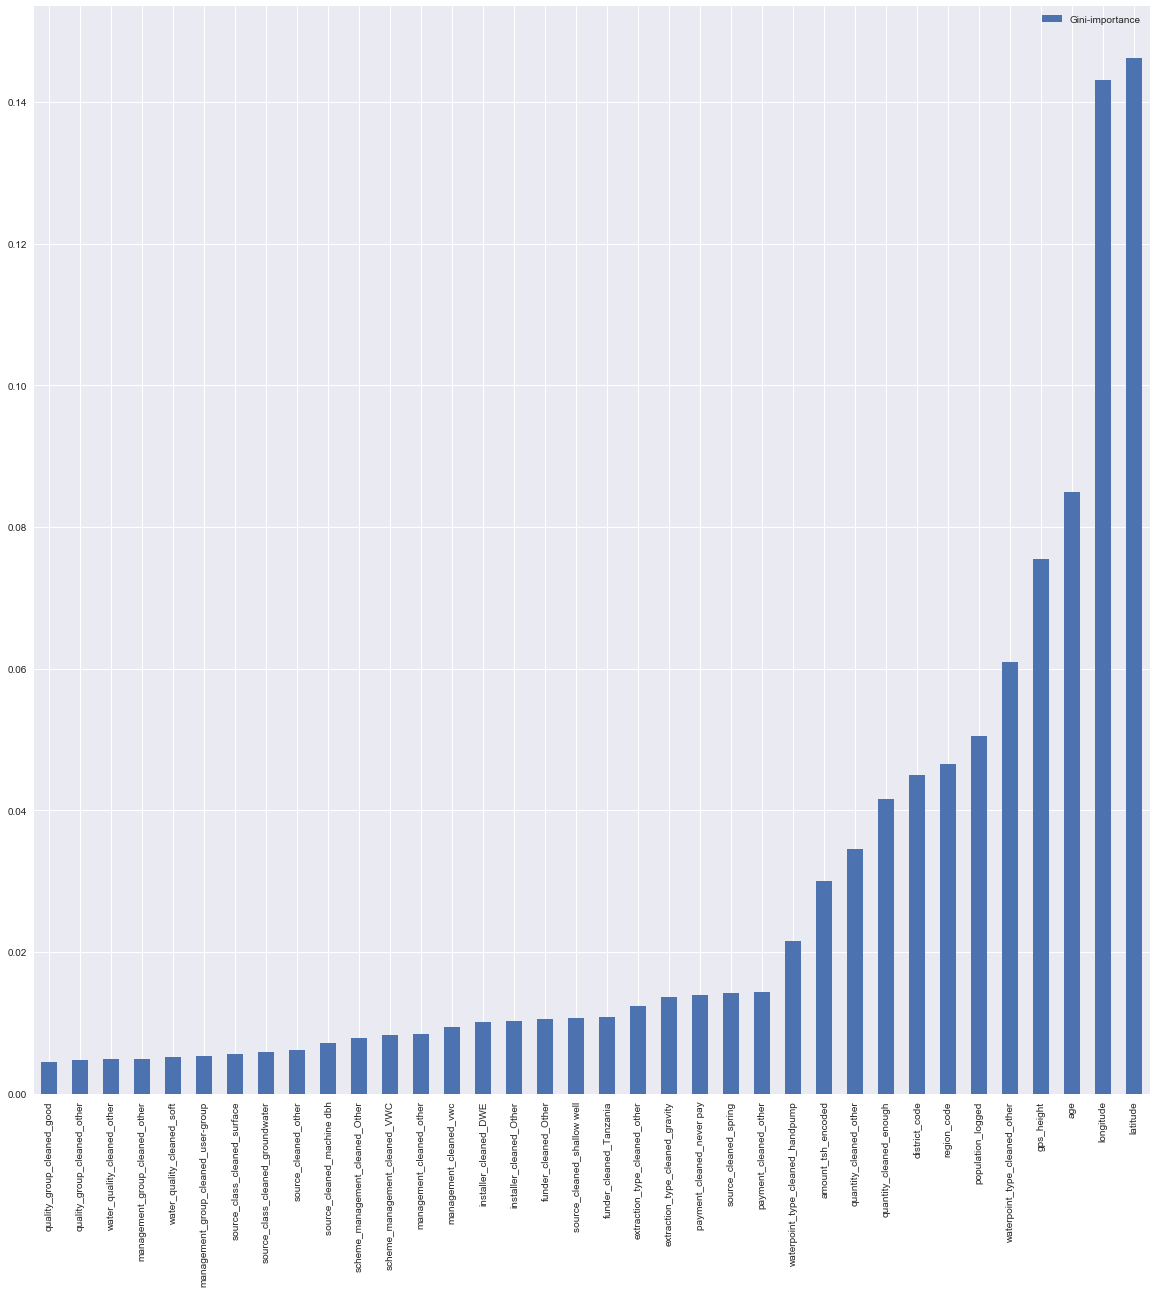

In [71]:
"""
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(data.columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar')
"""
plt.style.use('seaborn')
#fig, ax = plt.subplot(figsize=(12, 8))
feats = {}
for feature, importance in zip(feature_names, rf.feature_importances_):
    feats[feature] = importance
    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90, figsize=(20, 20))


# RandomForest Features Importances Coefficients

In [206]:
# RandomForestClassifier Feature Importances

feature_importances = importances.sort_values(by='Gini-importance')
feature_importances

,Gini-importance
quality_group_cleaned_good,0.004425
quality_group_cleaned_other,0.004786
water_quality_cleaned_other,0.004894
management_group_cleaned_other,0.004940
water_quality_cleaned_soft,0.005194
management_group_cleaned_user-group,0.005297
source_class_cleaned_surface,0.005643
source_class_cleaned_groundwater,0.005859
source_cleaned_other,0.006122
source_cleaned_machine dbh,0.007176


In [73]:
train_labels_copy.head()

,id,status_group,two_class
0,69572,functional,functional
1,8776,functional,functional
2,34310,functional,functional
3,67743,non functional,non functional
4,19728,functional,functional


In [74]:
train_labels_copy['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [75]:
status_group_num = []

for row in train_labels_copy['status_group']:
    if row == 'functional':
        status_group_num.append(0)
    elif row == 'functional needs repair':
        status_group_num.append(1)
    else:
        status_group_num.append(2)
        
train_labels_copy['status_group_num'] = status_group_num
train_labels_copy.head()

,id,status_group,two_class,status_group_num
0,69572,functional,functional,0
1,8776,functional,functional,0
2,34310,functional,functional,0
3,67743,non functional,non functional,2
4,19728,functional,functional,0


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X = df_train.drop(['id', 'status_group'], axis=1)
y = train_labels_copy['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LogisticRegression(C=100).fit(X_train, y_train)
scores = cross_val_score(lr, X, y, cv=5)

y_pred = lr.predict(X_test)

print("CV scores: {}".format(scores))
print("CV scores mean: {}".format(scores.mean()))


/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", Futur

CV scores: [0.66315967 0.65970878 0.66271044 0.67020202 0.66635797]
CV scores mean: 0.6644277752104382


In [77]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)

In [78]:
print(lr.classes_)

['functional' 'functional needs repair' 'non functional']


# LogisticRegression Coefficients

In [79]:
# LogisticRegression Coefficients
# 0 = functional
# 1 = functional but needs repair
# 2 = non functional

coefficients

,0,0,1,2
0,gps_height,-0.000110,-0.000304,0.000206
1,longitude,0.011597,-0.044987,0.015651
2,latitude,0.039037,0.027732,-0.046969
3,region_code,-0.012121,0.010621,0.009522
4,district_code,0.007436,-0.015543,-0.004557
5,age,-0.032530,0.009005,0.032941
6,population_logged,-0.018606,0.054199,0.003206
7,amount_tsh_encoded,0.557367,0.069837,-0.718250
8,funder_cleaned_Other,0.115052,-0.171932,-0.168378
9,funder_cleaned_Tanzania,-0.032894,0.001137,-0.114029


# LogisticRegression Coefficients Plot:
### Red: Non-Functional
### Blue: Functional
### Green: Functional Needs Repair
## Some factors important for differentiating functional and non-functional waterpoints:
1. waterpoint_type: **handpump**
2. water_source: **spring**
3. quanitity: **enough**
4. extraction_type: **gravity**

Text(0, 0.5, 'Coefficient magnitude')

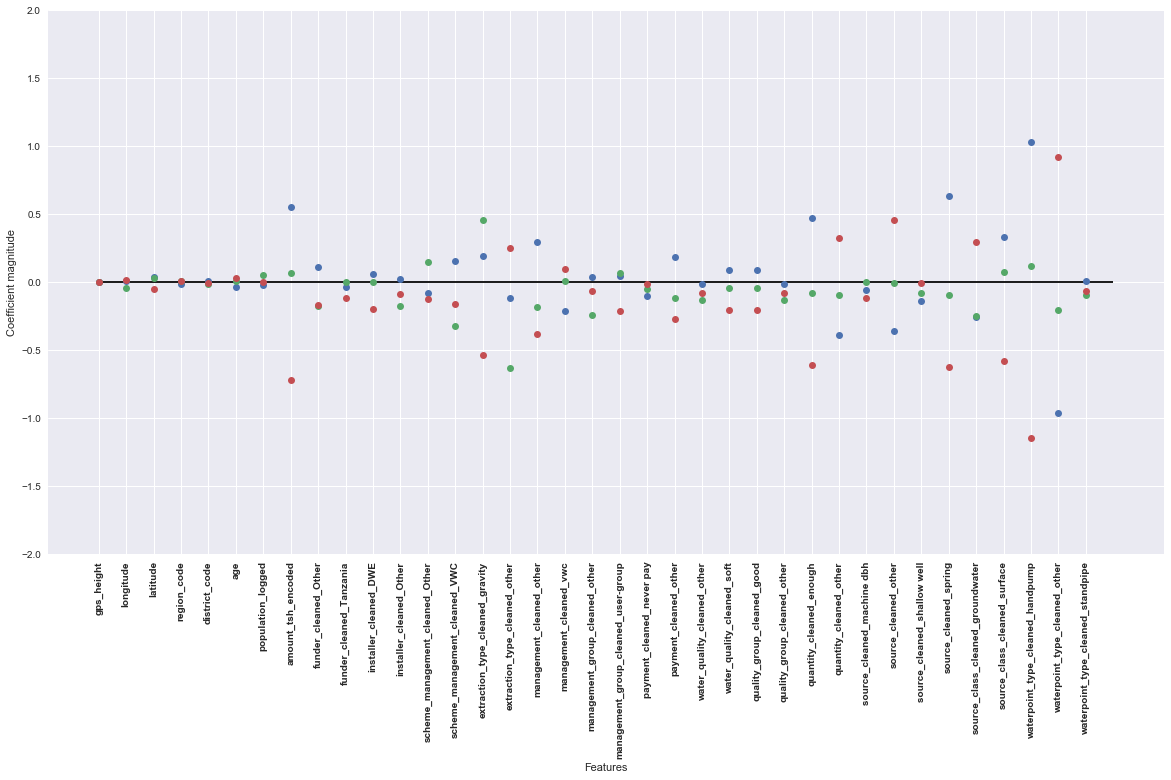

In [80]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(lr.coef_.T, 'o')
plt.xticks(range(X.shape[1]), X.columns, rotation=90, fontweight='bold')
plt.hlines(0, 0, X.shape[1])
plt.ylim(-2, 2)
plt.xlabel("Features")
plt.ylabel("Coefficient magnitude")



In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X = df_train.drop(['id', 'status_group'], axis=1)
y = df_train['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=3, max_features=6).fit(X_train, y_train)
scores = cross_val_score(rf, X, y, cv=5)

In [82]:
print(scores)

[0.78217322 0.78183655 0.78173401 0.77954545 0.77933996]


In [83]:
# rf_two_classes

X_test = df_test.drop('id', axis=1)
final_preds = rf_two_classes.predict(X_test)

kaggle_baseline_submission_9 = pd.DataFrame({'id': df_test.id, 'status_group': final_preds})
kaggle_baseline_submission_9.head()

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [84]:
kaggle_baseline_submission_9.to_csv('kagle_baseline_submission_9.csv', index=False)

In [85]:
df_full.head()

,id,gps_height,longitude,latitude,region_code,district_code,training_set,age,population_logged,amount_tsh_encoded,funder_cleaned,installer_cleaned,scheme_management_cleaned,extraction_type_cleaned,management_cleaned,management_group_cleaned,payment_cleaned,water_quality_cleaned,quality_group_cleaned,quantity_cleaned,source_cleaned,source_class_cleaned,waterpoint_type_cleaned
0,69572,1390,34.938093,-9.856322,11,5,True,12,4.691348,1,Other,Other,VWC,gravity,vwc,user-group,other,soft,good,enough,spring,groundwater,standpipe
1,8776,1399,34.698766,-2.147466,20,2,True,3,5.634790,0,Other,Other,Other,gravity,other,user-group,never pay,soft,good,other,other,surface,standpipe
2,34310,686,37.460664,-3.821329,21,4,True,4,5.521461,1,Other,Other,VWC,gravity,vwc,user-group,other,soft,good,enough,other,surface,standpipe
3,67743,263,38.486161,-11.155298,90,63,True,27,4.060443,0,Other,Other,VWC,other,vwc,user-group,never pay,soft,good,other,machine dbh,groundwater,standpipe
4,19728,0,31.130847,-1.825359,18,1,True,25,0.000000,0,Other,Other,Other,gravity,other,other,never pay,soft,good,other,other,surface,standpipe


In [86]:
df_full.shape

(73758, 23)

### More Data Cleaning:

In [87]:
df_full['population_logged'].describe()

count    73758.000000
mean         2.731700
std          2.736432
min          0.000000
25%          0.000000
50%          3.218876
75%          5.379897
max         10.325482
Name: population_logged, dtype: float64

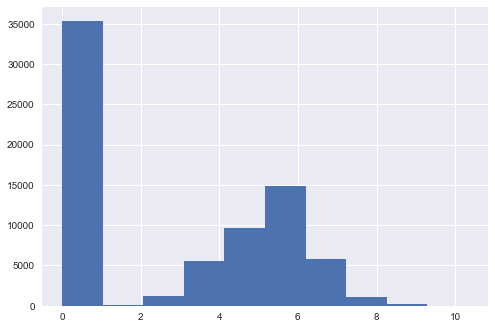

In [88]:
df_full['population_logged'].hist()

In [89]:
cats = pd.qcut(df_full['population_logged'], 2)
pd.value_counts(cats)

(-0.001, 3.219]    36986
(3.219, 10.325]    36772
Name: population_logged, dtype: int64

In [90]:
cats_population_logged = []

for row in cats:
    if row == '(-0.001, 3.219]':
        cats_population_logged.append('low_population')
    else:
        cats_population_logged.append('high_population')

df_full['cats_population_logged'] = cats_population_logged
               

In [91]:
df_full.head()

,id,gps_height,longitude,latitude,region_code,district_code,training_set,age,population_logged,amount_tsh_encoded,funder_cleaned,installer_cleaned,scheme_management_cleaned,extraction_type_cleaned,management_cleaned,management_group_cleaned,payment_cleaned,water_quality_cleaned,quality_group_cleaned,quantity_cleaned,source_cleaned,source_class_cleaned,waterpoint_type_cleaned,cats_population_logged
0,69572,1390,34.938093,-9.856322,11,5,True,12,4.691348,1,Other,Other,VWC,gravity,vwc,user-group,other,soft,good,enough,spring,groundwater,standpipe,high_population
1,8776,1399,34.698766,-2.147466,20,2,True,3,5.634790,0,Other,Other,Other,gravity,other,user-group,never pay,soft,good,other,other,surface,standpipe,high_population
2,34310,686,37.460664,-3.821329,21,4,True,4,5.521461,1,Other,Other,VWC,gravity,vwc,user-group,other,soft,good,enough,other,surface,standpipe,high_population
3,67743,263,38.486161,-11.155298,90,63,True,27,4.060443,0,Other,Other,VWC,other,vwc,user-group,never pay,soft,good,other,machine dbh,groundwater,standpipe,high_population
4,19728,0,31.130847,-1.825359,18,1,True,25,0.000000,0,Other,Other,Other,gravity,other,other,never pay,soft,good,other,other,surface,standpipe,high_population


In [92]:
df_full['region_code'].value_counts(normalize=True)

11    0.088872
17    0.084926
12    0.077117
3     0.074433
5     0.068793
18    0.056238
19    0.051655
2     0.050110
16    0.047900
10    0.044809
4     0.042151
1     0.037393
13    0.034369
14    0.033501
20    0.033217
15    0.030329
6     0.027522
21    0.025123
80    0.020811
60    0.017598
90    0.015320
7     0.013599
99    0.006928
9     0.006765
24    0.005450
8     0.005057
40    0.000014
Name: region_code, dtype: float64

In [93]:
region_code_cat = pd.qcut(df_full['region_code'], 3)
region_code_cat.value_counts(normalize=True)

(0.999, 10.0]    0.370631
(16.0, 99.0]     0.317281
(10.0, 16.0]     0.312088
Name: region_code, dtype: float64

In [94]:
region_cat = []

for row in region_code_cat:
    if row == '(0.999, 10.0]':
        region_cat.append('low_region')
    elif row == '(10.0, 16.0]':
        region_cat.append('medium_region')
    else:
        region_cat.append('high_region')

df_full['region_code_cat'] = region_cat
               

In [95]:
df_full.head()

,id,gps_height,longitude,latitude,region_code,district_code,training_set,age,population_logged,amount_tsh_encoded,funder_cleaned,installer_cleaned,scheme_management_cleaned,extraction_type_cleaned,management_cleaned,management_group_cleaned,payment_cleaned,water_quality_cleaned,quality_group_cleaned,quantity_cleaned,source_cleaned,source_class_cleaned,waterpoint_type_cleaned,cats_population_logged,region_code_cat
0,69572,1390,34.938093,-9.856322,11,5,True,12,4.691348,1,Other,Other,VWC,gravity,vwc,user-group,other,soft,good,enough,spring,groundwater,standpipe,high_population,high_region
1,8776,1399,34.698766,-2.147466,20,2,True,3,5.634790,0,Other,Other,Other,gravity,other,user-group,never pay,soft,good,other,other,surface,standpipe,high_population,high_region
2,34310,686,37.460664,-3.821329,21,4,True,4,5.521461,1,Other,Other,VWC,gravity,vwc,user-group,other,soft,good,enough,other,surface,standpipe,high_population,high_region
3,67743,263,38.486161,-11.155298,90,63,True,27,4.060443,0,Other,Other,VWC,other,vwc,user-group,never pay,soft,good,other,machine dbh,groundwater,standpipe,high_population,high_region
4,19728,0,31.130847,-1.825359,18,1,True,25,0.000000,0,Other,Other,Other,gravity,other,other,never pay,soft,good,other,other,surface,standpipe,high_population,high_region


In [96]:
df_full['district_code'].value_counts(normalize=True)

1     0.204588
2     0.188075
3     0.168985
4     0.151184
5     0.073348
6     0.069023
7     0.056319
8     0.017205
30    0.016988
33    0.014371
53    0.012473
43    0.008853
13    0.006725
23    0.004881
63    0.003579
62    0.001722
60    0.001030
0     0.000366
80    0.000176
67    0.000108
Name: district_code, dtype: float64

In [97]:
district_code_cat = pd.qcut(df_full['district_code'], 3)
district_code_cat.value_counts(normalize=True)

(-0.001, 2.0]    0.393029
(2.0, 4.0]       0.320169
(4.0, 80.0]      0.286803
Name: district_code, dtype: float64

In [98]:
district_cat = []

for row in district_code_cat:
    if row == '(-0.001, 2.0]':
        district_cat.append('low_district')
    elif row == '(2.0, 4.0]':
        district_cat.append('medium_district')
    else:
        district_cat.append('high_district')

df_full['district_code_cat'] = district_cat
               

In [99]:
df_full.head()

,id,gps_height,longitude,latitude,region_code,district_code,training_set,age,population_logged,amount_tsh_encoded,funder_cleaned,installer_cleaned,scheme_management_cleaned,extraction_type_cleaned,management_cleaned,management_group_cleaned,payment_cleaned,water_quality_cleaned,quality_group_cleaned,quantity_cleaned,source_cleaned,source_class_cleaned,waterpoint_type_cleaned,cats_population_logged,region_code_cat,district_code_cat
0,69572,1390,34.938093,-9.856322,11,5,True,12,4.691348,1,Other,Other,VWC,gravity,vwc,user-group,other,soft,good,enough,spring,groundwater,standpipe,high_population,high_region,high_district
1,8776,1399,34.698766,-2.147466,20,2,True,3,5.634790,0,Other,Other,Other,gravity,other,user-group,never pay,soft,good,other,other,surface,standpipe,high_population,high_region,high_district
2,34310,686,37.460664,-3.821329,21,4,True,4,5.521461,1,Other,Other,VWC,gravity,vwc,user-group,other,soft,good,enough,other,surface,standpipe,high_population,high_region,high_district
3,67743,263,38.486161,-11.155298,90,63,True,27,4.060443,0,Other,Other,VWC,other,vwc,user-group,never pay,soft,good,other,machine dbh,groundwater,standpipe,high_population,high_region,high_district
4,19728,0,31.130847,-1.825359,18,1,True,25,0.000000,0,Other,Other,Other,gravity,other,other,never pay,soft,good,other,other,surface,standpipe,high_population,high_region,high_district


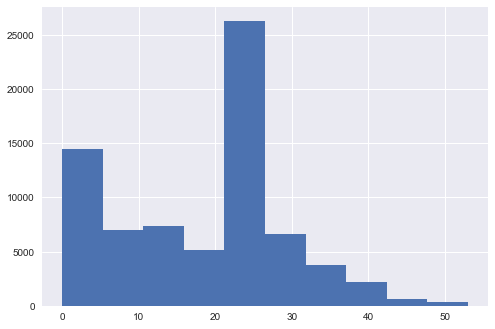

In [100]:
df_full['age'].hist()

In [101]:
df_full['age'].value_counts(normalize=True)

25    0.234524
26    0.097020
27    0.049757
3     0.045690
1     0.039060
2     0.036633
5     0.033664
4     0.031251
13    0.031075
7     0.024404
6     0.023401
11    0.022655
14    0.019700
8     0.019361
33    0.018534
15    0.016581
23    0.014968
16    0.014398
10    0.014317
9     0.013517
19    0.013097
18    0.012907
31    0.012121
28    0.012066
17    0.010792
35    0.010670
37    0.009870
0     0.009857
21    0.009789
39    0.009789
12    0.009572
29    0.009572
20    0.009016
41    0.008419
38    0.005979
30    0.005816
43    0.005762
36    0.005559
22    0.005423
24    0.004366
40    0.003932
34    0.003159
32    0.002901
42    0.001518
53    0.001505
50    0.001424
45    0.001085
44    0.000786
46    0.000746
48    0.000651
51    0.000515
49    0.000366
47    0.000244
52    0.000217
Name: age, dtype: float64

In [102]:
df_full['age'] = df_full['age'].replace(25, np.nan)

### Here I'm replacing missing values in ```df_full['age']``` with the same distribution that it exists in and then encoding them into quartiles using ```pd.qcut()```

In [103]:
s = df_full['age'].value_counts(normalize=True)

In [104]:
missing = df_full['age'].isnull()
df_full.loc[missing,'age'] = np.random.choice(s.index, size=len(df_full[missing]),p=s.values)

In [105]:
df_full['age'].isna().sum()

0

In [106]:
df_full['age'].value_counts(normalize=True)

26.0    0.127146
27.0    0.064685
3.0     0.059302
1.0     0.051330
2.0     0.047805
5.0     0.043955
4.0     0.041229
13.0    0.040253
7.0     0.032335
6.0     0.030437
11.0    0.030085
14.0    0.025733
8.0     0.025557
33.0    0.024106
15.0    0.021828
23.0    0.019496
16.0    0.018683
10.0    0.018479
9.0     0.017693
18.0    0.017232
19.0    0.016717
28.0    0.015673
31.0    0.015578
17.0    0.014100
35.0    0.013775
0.0     0.013110
37.0    0.013002
21.0    0.012812
39.0    0.012568
12.0    0.012487
29.0    0.012392
20.0    0.011768
41.0    0.010589
30.0    0.007918
43.0    0.007633
38.0    0.007552
36.0    0.007457
22.0    0.006942
24.0    0.005749
40.0    0.005071
34.0    0.004189
32.0    0.003756
42.0    0.001966
53.0    0.001939
50.0    0.001857
45.0    0.001274
46.0    0.001030
44.0    0.001017
48.0    0.000881
51.0    0.000678
49.0    0.000502
47.0    0.000339
52.0    0.000312
Name: age, dtype: float64

In [107]:
df_full.head()

,id,gps_height,longitude,latitude,region_code,district_code,training_set,age,population_logged,amount_tsh_encoded,funder_cleaned,installer_cleaned,scheme_management_cleaned,extraction_type_cleaned,management_cleaned,management_group_cleaned,payment_cleaned,water_quality_cleaned,quality_group_cleaned,quantity_cleaned,source_cleaned,source_class_cleaned,waterpoint_type_cleaned,cats_population_logged,region_code_cat,district_code_cat
0,69572,1390,34.938093,-9.856322,11,5,True,12.0,4.691348,1,Other,Other,VWC,gravity,vwc,user-group,other,soft,good,enough,spring,groundwater,standpipe,high_population,high_region,high_district
1,8776,1399,34.698766,-2.147466,20,2,True,3.0,5.634790,0,Other,Other,Other,gravity,other,user-group,never pay,soft,good,other,other,surface,standpipe,high_population,high_region,high_district
2,34310,686,37.460664,-3.821329,21,4,True,4.0,5.521461,1,Other,Other,VWC,gravity,vwc,user-group,other,soft,good,enough,other,surface,standpipe,high_population,high_region,high_district
3,67743,263,38.486161,-11.155298,90,63,True,27.0,4.060443,0,Other,Other,VWC,other,vwc,user-group,never pay,soft,good,other,machine dbh,groundwater,standpipe,high_population,high_region,high_district
4,19728,0,31.130847,-1.825359,18,1,True,9.0,0.000000,0,Other,Other,Other,gravity,other,other,never pay,soft,good,other,other,surface,standpipe,high_population,high_region,high_district


In [108]:
age_catss = pd.qcut(df_full['age'], 4)


In [109]:
pd.value_counts(age_catss, normalize=True)

(-0.001, 5.0]    0.256731
(5.0, 15.0]      0.254888
(15.0, 26.0]     0.250644
(26.0, 53.0]     0.237737
Name: age, dtype: float64

In [110]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

age_category = le.fit_transform(age_catss)

In [111]:
age_category[:10]

array([1, 0, 0, 3, 1, 0, 2, 2, 2, 3])

In [112]:
list(le.classes_)

[Interval(-0.001, 5.0, closed='right'),
 Interval(5.0, 15.0, closed='right'),
 Interval(15.0, 26.0, closed='right'),
 Interval(26.0, 53.0, closed='right')]

In [113]:
type(age_category)

numpy.ndarray

In [114]:
df_full['age_category'] = age_category

In [115]:
df_full.head()

,id,gps_height,longitude,latitude,region_code,district_code,training_set,age,population_logged,amount_tsh_encoded,funder_cleaned,installer_cleaned,scheme_management_cleaned,extraction_type_cleaned,management_cleaned,management_group_cleaned,payment_cleaned,water_quality_cleaned,quality_group_cleaned,quantity_cleaned,source_cleaned,source_class_cleaned,waterpoint_type_cleaned,cats_population_logged,region_code_cat,district_code_cat,age_category
0,69572,1390,34.938093,-9.856322,11,5,True,12.0,4.691348,1,Other,Other,VWC,gravity,vwc,user-group,other,soft,good,enough,spring,groundwater,standpipe,high_population,high_region,high_district,1
1,8776,1399,34.698766,-2.147466,20,2,True,3.0,5.634790,0,Other,Other,Other,gravity,other,user-group,never pay,soft,good,other,other,surface,standpipe,high_population,high_region,high_district,0
2,34310,686,37.460664,-3.821329,21,4,True,4.0,5.521461,1,Other,Other,VWC,gravity,vwc,user-group,other,soft,good,enough,other,surface,standpipe,high_population,high_region,high_district,0
3,67743,263,38.486161,-11.155298,90,63,True,27.0,4.060443,0,Other,Other,VWC,other,vwc,user-group,never pay,soft,good,other,machine dbh,groundwater,standpipe,high_population,high_region,high_district,3
4,19728,0,31.130847,-1.825359,18,1,True,9.0,0.000000,0,Other,Other,Other,gravity,other,other,never pay,soft,good,other,other,surface,standpipe,high_population,high_region,high_district,1


In [116]:
df_full['age_category'].value_counts()

0    18936
1    18800
2    18487
3    17535
Name: age_category, dtype: int64

In [117]:
df_full.head()

,id,gps_height,longitude,latitude,region_code,district_code,training_set,age,population_logged,amount_tsh_encoded,funder_cleaned,installer_cleaned,scheme_management_cleaned,extraction_type_cleaned,management_cleaned,management_group_cleaned,payment_cleaned,water_quality_cleaned,quality_group_cleaned,quantity_cleaned,source_cleaned,source_class_cleaned,waterpoint_type_cleaned,cats_population_logged,region_code_cat,district_code_cat,age_category
0,69572,1390,34.938093,-9.856322,11,5,True,12.0,4.691348,1,Other,Other,VWC,gravity,vwc,user-group,other,soft,good,enough,spring,groundwater,standpipe,high_population,high_region,high_district,1
1,8776,1399,34.698766,-2.147466,20,2,True,3.0,5.634790,0,Other,Other,Other,gravity,other,user-group,never pay,soft,good,other,other,surface,standpipe,high_population,high_region,high_district,0
2,34310,686,37.460664,-3.821329,21,4,True,4.0,5.521461,1,Other,Other,VWC,gravity,vwc,user-group,other,soft,good,enough,other,surface,standpipe,high_population,high_region,high_district,0
3,67743,263,38.486161,-11.155298,90,63,True,27.0,4.060443,0,Other,Other,VWC,other,vwc,user-group,never pay,soft,good,other,machine dbh,groundwater,standpipe,high_population,high_region,high_district,3
4,19728,0,31.130847,-1.825359,18,1,True,9.0,0.000000,0,Other,Other,Other,gravity,other,other,never pay,soft,good,other,other,surface,standpipe,high_population,high_region,high_district,1


### Using K-Means Clustering to replace the 'longitude' and 'latitude' features:

In [118]:
long_lat = df_full[['longitude', 'latitude']].values

long_lat[:5]

array([[ 34.93809275,  -9.85632177],
       [ 34.6987661 ,  -2.14746569],
       [ 37.46066446,  -3.82132853],
       [ 38.48616088, -11.15529772],
       [ 31.13084671,  -1.82535885]])

In [119]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(long_lat)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [120]:
print("cluster memberships:\n{}".format(kmeans.labels_[:25]))

cluster memberships:
[2 0 0 2 0 2 0 0 0 0 2 2 0 0 0 2 2 2 0 2 2 1 2 0 0]


In [121]:
coord_cluster = kmeans.labels_
print(coord_cluster)

[2 0 0 ... 0 2 2]


In [122]:
df_full['coord_cluster'] = coord_cluster

In [123]:
df_full.head()

,id,gps_height,longitude,latitude,region_code,district_code,training_set,age,population_logged,amount_tsh_encoded,funder_cleaned,installer_cleaned,scheme_management_cleaned,extraction_type_cleaned,management_cleaned,management_group_cleaned,payment_cleaned,water_quality_cleaned,quality_group_cleaned,quantity_cleaned,source_cleaned,source_class_cleaned,waterpoint_type_cleaned,cats_population_logged,region_code_cat,district_code_cat,age_category,coord_cluster
0,69572,1390,34.938093,-9.856322,11,5,True,12.0,4.691348,1,Other,Other,VWC,gravity,vwc,user-group,other,soft,good,enough,spring,groundwater,standpipe,high_population,high_region,high_district,1,2
1,8776,1399,34.698766,-2.147466,20,2,True,3.0,5.634790,0,Other,Other,Other,gravity,other,user-group,never pay,soft,good,other,other,surface,standpipe,high_population,high_region,high_district,0,0
2,34310,686,37.460664,-3.821329,21,4,True,4.0,5.521461,1,Other,Other,VWC,gravity,vwc,user-group,other,soft,good,enough,other,surface,standpipe,high_population,high_region,high_district,0,0
3,67743,263,38.486161,-11.155298,90,63,True,27.0,4.060443,0,Other,Other,VWC,other,vwc,user-group,never pay,soft,good,other,machine dbh,groundwater,standpipe,high_population,high_region,high_district,3,2
4,19728,0,31.130847,-1.825359,18,1,True,9.0,0.000000,0,Other,Other,Other,gravity,other,other,never pay,soft,good,other,other,surface,standpipe,high_population,high_region,high_district,1,0


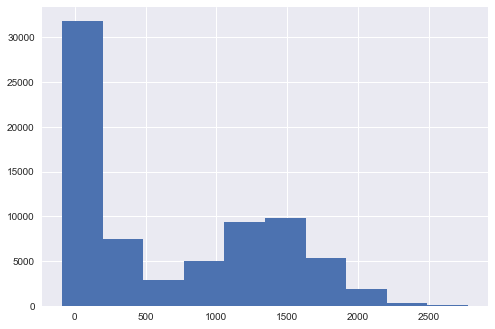

In [124]:
df_full['gps_height'].hist()

In [125]:
df_full['gps_height'].value_counts(normalize=True)

 0       0.344586
-16      0.000963
-15      0.000935
-13      0.000922
-19      0.000881
-14      0.000868
 1290    0.000813
-18      0.000813
 303     0.000800
-20      0.000786
 1293    0.000773
 1295    0.000773
-11      0.000746
-23      0.000746
 280     0.000732
 1303    0.000732
-27      0.000732
-17      0.000732
 1332    0.000719
 1271    0.000719
-8       0.000719
 1306    0.000705
 1362    0.000705
 1538    0.000705
 1301    0.000705
 1270    0.000705
-6       0.000705
 1304    0.000691
 1269    0.000691
 1314    0.000691
 1183    0.000691
 1286    0.000678
 1330    0.000678
 1319    0.000678
 1325    0.000678
 1289    0.000678
 1359    0.000678
-7       0.000678
 1312    0.000664
 1309    0.000664
 1317    0.000664
-2       0.000664
 1285    0.000664
-12      0.000664
 306     0.000664
 1288    0.000664
 1272    0.000664
 1311    0.000664
-21      0.000664
 1342    0.000651
 12      0.000651
 1358    0.000651
 1373    0.000651
 1300    0.000651
 1266    0.000651
-5       0

In [126]:
df_full.to_csv('df_full_2.csv', index=False)

In [127]:
drop_list = ['region_code', 'district_code', 'age', 'longitude', 'latitude', 'gps_height']

df_full.drop(drop_list, axis=1, inplace=True)

In [128]:
df_full.head()

,id,training_set,population_logged,amount_tsh_encoded,funder_cleaned,installer_cleaned,scheme_management_cleaned,extraction_type_cleaned,management_cleaned,management_group_cleaned,payment_cleaned,water_quality_cleaned,quality_group_cleaned,quantity_cleaned,source_cleaned,source_class_cleaned,waterpoint_type_cleaned,cats_population_logged,region_code_cat,district_code_cat,age_category,coord_cluster
0,69572,True,4.691348,1,Other,Other,VWC,gravity,vwc,user-group,other,soft,good,enough,spring,groundwater,standpipe,high_population,high_region,high_district,1,2
1,8776,True,5.634790,0,Other,Other,Other,gravity,other,user-group,never pay,soft,good,other,other,surface,standpipe,high_population,high_region,high_district,0,0
2,34310,True,5.521461,1,Other,Other,VWC,gravity,vwc,user-group,other,soft,good,enough,other,surface,standpipe,high_population,high_region,high_district,0,0
3,67743,True,4.060443,0,Other,Other,VWC,other,vwc,user-group,never pay,soft,good,other,machine dbh,groundwater,standpipe,high_population,high_region,high_district,3,2
4,19728,True,0.000000,0,Other,Other,Other,gravity,other,other,never pay,soft,good,other,other,surface,standpipe,high_population,high_region,high_district,1,0


In [129]:
df_full.to_csv('df_full_3_with_var_dropped.csv', index=False)

In [130]:
dummy_columns=['funder_cleaned', 'installer_cleaned', 'scheme_management_cleaned', 'extraction_type_cleaned',
        'management_cleaned', 'management_group_cleaned', 'payment_cleaned', 'water_quality_cleaned',
        'quality_group_cleaned', 'quantity_cleaned', 'source_cleaned', 'source_class_cleaned',
        'waterpoint_type_cleaned', 'cats_population_logged', 'region_code_cat', 'district_code_cat', 'coord_cluster']

In [131]:
print("Original Features:\n", list(df_full.columns), "\n")
df_full_dummies_2 = pd.get_dummies(df_full, columns=dummy_columns)
print("Features after get_dummies: \n", list(df_full_dummies_2.columns))

Original Features:
 ['id', 'training_set', 'population_logged', 'amount_tsh_encoded', 'funder_cleaned', 'installer_cleaned', 'scheme_management_cleaned', 'extraction_type_cleaned', 'management_cleaned', 'management_group_cleaned', 'payment_cleaned', 'water_quality_cleaned', 'quality_group_cleaned', 'quantity_cleaned', 'source_cleaned', 'source_class_cleaned', 'waterpoint_type_cleaned', 'cats_population_logged', 'region_code_cat', 'district_code_cat', 'age_category', 'coord_cluster'] 

Features after get_dummies: 
 ['id', 'training_set', 'population_logged', 'amount_tsh_encoded', 'age_category', 'funder_cleaned_Other', 'funder_cleaned_Tanzania', 'installer_cleaned_DWE', 'installer_cleaned_Other', 'scheme_management_cleaned_Other', 'scheme_management_cleaned_VWC', 'extraction_type_cleaned_gravity', 'extraction_type_cleaned_other', 'management_cleaned_other', 'management_cleaned_vwc', 'management_group_cleaned_other', 'management_group_cleaned_user-group', 'payment_cleaned_never pay', 'pa

### Original Features are now expanded to 40 columns

In [132]:
len(df_full_dummies_2.columns)

40

In [133]:
df_full_dummies_2.head()

,id,training_set,population_logged,amount_tsh_encoded,age_category,funder_cleaned_Other,funder_cleaned_Tanzania,installer_cleaned_DWE,installer_cleaned_Other,scheme_management_cleaned_Other,scheme_management_cleaned_VWC,extraction_type_cleaned_gravity,extraction_type_cleaned_other,management_cleaned_other,management_cleaned_vwc,management_group_cleaned_other,management_group_cleaned_user-group,payment_cleaned_never pay,payment_cleaned_other,water_quality_cleaned_other,water_quality_cleaned_soft,quality_group_cleaned_good,quality_group_cleaned_other,quantity_cleaned_enough,quantity_cleaned_other,source_cleaned_machine dbh,source_cleaned_other,source_cleaned_shallow well,source_cleaned_spring,source_class_cleaned_groundwater,source_class_cleaned_surface,waterpoint_type_cleaned_handpump,waterpoint_type_cleaned_other,waterpoint_type_cleaned_standpipe,cats_population_logged_high_population,region_code_cat_high_region,district_code_cat_high_district,coord_cluster_0,coord_cluster_1,coord_cluster_2
0,69572,True,4.691348,1,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,1,1,1,0,0,1
1,8776,True,5.634790,0,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1,1,1,1,1,0,0
2,34310,True,5.521461,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,1,0,0
3,67743,True,4.060443,0,3,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1,1,1,1,0,0,1
4,19728,True,0.000000,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1,1,1,1,1,0,0


In [134]:
df_full_dummies_2.to_csv('df_full_dummies_2.csv', index=False)

### Let's separate out the training and testing sets again like we did before

In [135]:
df_train_2 = df_full_dummies_2[df_full_dummies_2['training_set'] == True]
df_train_2 = df_train_2.drop('training_set', axis=1)

df_test_2 = df_full_dummies_2[df_full_dummies_2['training_set'] == False]
df_test_2 = df_test_2.drop('training_set', axis=1)

In [136]:
df_train_2.head()

,id,population_logged,amount_tsh_encoded,age_category,funder_cleaned_Other,funder_cleaned_Tanzania,installer_cleaned_DWE,installer_cleaned_Other,scheme_management_cleaned_Other,scheme_management_cleaned_VWC,extraction_type_cleaned_gravity,extraction_type_cleaned_other,management_cleaned_other,management_cleaned_vwc,management_group_cleaned_other,management_group_cleaned_user-group,payment_cleaned_never pay,payment_cleaned_other,water_quality_cleaned_other,water_quality_cleaned_soft,quality_group_cleaned_good,quality_group_cleaned_other,quantity_cleaned_enough,quantity_cleaned_other,source_cleaned_machine dbh,source_cleaned_other,source_cleaned_shallow well,source_cleaned_spring,source_class_cleaned_groundwater,source_class_cleaned_surface,waterpoint_type_cleaned_handpump,waterpoint_type_cleaned_other,waterpoint_type_cleaned_standpipe,cats_population_logged_high_population,region_code_cat_high_region,district_code_cat_high_district,coord_cluster_0,coord_cluster_1,coord_cluster_2
0,69572,4.691348,1,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,1,1,1,0,0,1
1,8776,5.634790,0,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1,1,1,1,1,0,0
2,34310,5.521461,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,1,0,0
3,67743,4.060443,0,3,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1,1,1,1,0,0,1
4,19728,0.000000,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1,1,1,1,1,0,0


In [137]:
df_test_2.head()

,id,population_logged,amount_tsh_encoded,age_category,funder_cleaned_Other,funder_cleaned_Tanzania,installer_cleaned_DWE,installer_cleaned_Other,scheme_management_cleaned_Other,scheme_management_cleaned_VWC,extraction_type_cleaned_gravity,extraction_type_cleaned_other,management_cleaned_other,management_cleaned_vwc,management_group_cleaned_other,management_group_cleaned_user-group,payment_cleaned_never pay,payment_cleaned_other,water_quality_cleaned_other,water_quality_cleaned_soft,quality_group_cleaned_good,quality_group_cleaned_other,quantity_cleaned_enough,quantity_cleaned_other,source_cleaned_machine dbh,source_cleaned_other,source_cleaned_shallow well,source_cleaned_spring,source_class_cleaned_groundwater,source_class_cleaned_surface,waterpoint_type_cleaned_handpump,waterpoint_type_cleaned_other,waterpoint_type_cleaned_standpipe,cats_population_logged_high_population,region_code_cat_high_region,district_code_cat_high_district,coord_cluster_0,coord_cluster_1,coord_cluster_2
0,50785,5.771441,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,0,0
1,51630,5.703782,0,1,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1,1,1,1,1,0,0
2,17168,6.214608,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,0,0
3,45559,5.521461,0,2,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,1,1,1,0,0,1
4,49871,4.094345,1,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,1,1,1,0,0,1


In [138]:
print(df_train_2.shape)
print(df_test_2.shape)

(59400, 39)
(14358, 39)


In [139]:
df_train_2.to_csv('cleaned_train_features_2.csv', index=False)
df_test_2.to_csv('cleaned_test_features_2.csv', index=False)

### Bring in the training labels:

In [140]:
train_labels = pd.read_csv('train_labels.csv')
train_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [141]:
df_train_2.head()

,id,population_logged,amount_tsh_encoded,age_category,funder_cleaned_Other,funder_cleaned_Tanzania,installer_cleaned_DWE,installer_cleaned_Other,scheme_management_cleaned_Other,scheme_management_cleaned_VWC,extraction_type_cleaned_gravity,extraction_type_cleaned_other,management_cleaned_other,management_cleaned_vwc,management_group_cleaned_other,management_group_cleaned_user-group,payment_cleaned_never pay,payment_cleaned_other,water_quality_cleaned_other,water_quality_cleaned_soft,quality_group_cleaned_good,quality_group_cleaned_other,quantity_cleaned_enough,quantity_cleaned_other,source_cleaned_machine dbh,source_cleaned_other,source_cleaned_shallow well,source_cleaned_spring,source_class_cleaned_groundwater,source_class_cleaned_surface,waterpoint_type_cleaned_handpump,waterpoint_type_cleaned_other,waterpoint_type_cleaned_standpipe,cats_population_logged_high_population,region_code_cat_high_region,district_code_cat_high_district,coord_cluster_0,coord_cluster_1,coord_cluster_2
0,69572,4.691348,1,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,1,1,1,0,0,1
1,8776,5.634790,0,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1,1,1,1,1,0,0
2,34310,5.521461,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,1,0,0
3,67743,4.060443,0,3,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1,1,1,1,0,0,1
4,19728,0.000000,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1,1,1,1,1,0,0


In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X = df_train_2.drop('id', axis=1)
y = train_labels['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr_2 = LogisticRegression(C=100).fit(X_train, y_train)
# scores = cross_val_score(lr, X, y, cv=5) # Cross-validating the model on the whole dataset

y_pred = lr_2.predict(X_test)

# print("CV scores: {}".format(scores))
# print("CV scores mean: {}".format(scores.mean()))

print("Training set score: {:.2}".format(lr_2.score(X_train, y_train)))
print("Testing score: {:.2f}".format(lr_2.score(X_test, y_test)))

/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training set score: 0.66
Testing score: 0.66


In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X = df_train_2.drop('id', axis=1)
y = train_labels['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf_2 = RandomForestClassifier(n_estimators=100, min_samples_leaf=3).fit(X_train, y_train)
scores_2 = cross_val_score(rf_2, X, y, cv=5)

y_pred = rf_2.predict(X_test)

print("CV scores: {}".format(scores_2))

CV scores: [0.73428163 0.73226159 0.72988215 0.73712121 0.73034181]


In [144]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lr_2.coef_))], axis = 1)
coefficients

,0,0,1,2
0,population_logged,-0.006266,-0.001662,0.006460
1,amount_tsh_encoded,0.609598,0.030376,-0.726052
2,age_category,-0.277432,0.090510,0.268358
3,funder_cleaned_Other,0.106335,-0.191300,-0.113156
4,funder_cleaned_Tanzania,-0.074197,-0.014352,0.018965
5,installer_cleaned_DWE,0.036644,-0.006489,-0.103992
6,installer_cleaned_Other,-0.004506,-0.199164,0.009802
7,scheme_management_cleaned_Other,-0.081575,0.155012,-0.052256
8,scheme_management_cleaned_VWC,0.113713,-0.360664,-0.041934
9,extraction_type_cleaned_gravity,0.168147,0.486717,-0.411601


In [145]:
list(lr_2.classes_)

['functional', 'functional needs repair', 'non functional']

Text(0, 0.5, 'Coefficient magnitude')

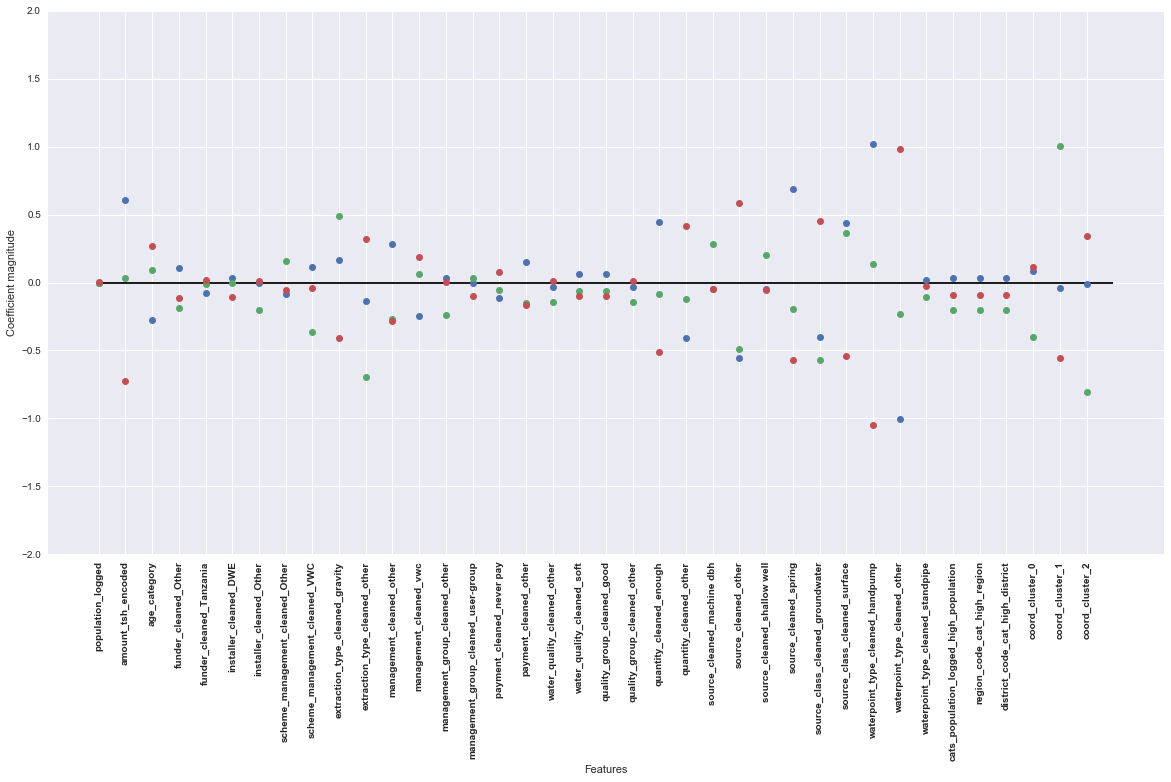

In [146]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(lr_2.coef_.T, 'o')
plt.xticks(range(X.shape[1]), X.columns, rotation=90, fontweight='bold')
plt.hlines(0, 0, X.shape[1])
plt.ylim(-2, 2)
plt.xlabel("Features")
plt.ylabel("Coefficient magnitude")



In [147]:
df_full.head()

,id,training_set,population_logged,amount_tsh_encoded,funder_cleaned,installer_cleaned,scheme_management_cleaned,extraction_type_cleaned,management_cleaned,management_group_cleaned,payment_cleaned,water_quality_cleaned,quality_group_cleaned,quantity_cleaned,source_cleaned,source_class_cleaned,waterpoint_type_cleaned,cats_population_logged,region_code_cat,district_code_cat,age_category,coord_cluster
0,69572,True,4.691348,1,Other,Other,VWC,gravity,vwc,user-group,other,soft,good,enough,spring,groundwater,standpipe,high_population,high_region,high_district,1,2
1,8776,True,5.634790,0,Other,Other,Other,gravity,other,user-group,never pay,soft,good,other,other,surface,standpipe,high_population,high_region,high_district,0,0
2,34310,True,5.521461,1,Other,Other,VWC,gravity,vwc,user-group,other,soft,good,enough,other,surface,standpipe,high_population,high_region,high_district,0,0
3,67743,True,4.060443,0,Other,Other,VWC,other,vwc,user-group,never pay,soft,good,other,machine dbh,groundwater,standpipe,high_population,high_region,high_district,3,2
4,19728,True,0.000000,0,Other,Other,Other,gravity,other,other,never pay,soft,good,other,other,surface,standpipe,high_population,high_region,high_district,1,0


In [148]:
df_full.drop('cats_population_logged', axis=1, inplace=True)

In [149]:
df_full.head()

,id,training_set,population_logged,amount_tsh_encoded,funder_cleaned,installer_cleaned,scheme_management_cleaned,extraction_type_cleaned,management_cleaned,management_group_cleaned,payment_cleaned,water_quality_cleaned,quality_group_cleaned,quantity_cleaned,source_cleaned,source_class_cleaned,waterpoint_type_cleaned,region_code_cat,district_code_cat,age_category,coord_cluster
0,69572,True,4.691348,1,Other,Other,VWC,gravity,vwc,user-group,other,soft,good,enough,spring,groundwater,standpipe,high_region,high_district,1,2
1,8776,True,5.634790,0,Other,Other,Other,gravity,other,user-group,never pay,soft,good,other,other,surface,standpipe,high_region,high_district,0,0
2,34310,True,5.521461,1,Other,Other,VWC,gravity,vwc,user-group,other,soft,good,enough,other,surface,standpipe,high_region,high_district,0,0
3,67743,True,4.060443,0,Other,Other,VWC,other,vwc,user-group,never pay,soft,good,other,machine dbh,groundwater,standpipe,high_region,high_district,3,2
4,19728,True,0.000000,0,Other,Other,Other,gravity,other,other,never pay,soft,good,other,other,surface,standpipe,high_region,high_district,1,0


In [150]:
df_full['population_logged'].describe()

count    73758.000000
mean         2.731700
std          2.736432
min          0.000000
25%          0.000000
50%          3.218876
75%          5.379897
max         10.325482
Name: population_logged, dtype: float64

In [151]:
population_cat = pd.qcut(df_full['population_logged'], 2)

In [152]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
population_cat = le.fit_transform(population_cat)

In [153]:
population_cat

array([1, 1, 1, ..., 1, 1, 1])

In [154]:
df_full['population_cat'] = population_cat
df_full.head()

,id,training_set,population_logged,amount_tsh_encoded,funder_cleaned,installer_cleaned,scheme_management_cleaned,extraction_type_cleaned,management_cleaned,management_group_cleaned,payment_cleaned,water_quality_cleaned,quality_group_cleaned,quantity_cleaned,source_cleaned,source_class_cleaned,waterpoint_type_cleaned,region_code_cat,district_code_cat,age_category,coord_cluster,population_cat
0,69572,True,4.691348,1,Other,Other,VWC,gravity,vwc,user-group,other,soft,good,enough,spring,groundwater,standpipe,high_region,high_district,1,2,1
1,8776,True,5.634790,0,Other,Other,Other,gravity,other,user-group,never pay,soft,good,other,other,surface,standpipe,high_region,high_district,0,0,1
2,34310,True,5.521461,1,Other,Other,VWC,gravity,vwc,user-group,other,soft,good,enough,other,surface,standpipe,high_region,high_district,0,0,1
3,67743,True,4.060443,0,Other,Other,VWC,other,vwc,user-group,never pay,soft,good,other,machine dbh,groundwater,standpipe,high_region,high_district,3,2,1
4,19728,True,0.000000,0,Other,Other,Other,gravity,other,other,never pay,soft,good,other,other,surface,standpipe,high_region,high_district,1,0,0


In [155]:
df_full.head()

,id,training_set,population_logged,amount_tsh_encoded,funder_cleaned,installer_cleaned,scheme_management_cleaned,extraction_type_cleaned,management_cleaned,management_group_cleaned,payment_cleaned,water_quality_cleaned,quality_group_cleaned,quantity_cleaned,source_cleaned,source_class_cleaned,waterpoint_type_cleaned,region_code_cat,district_code_cat,age_category,coord_cluster,population_cat
0,69572,True,4.691348,1,Other,Other,VWC,gravity,vwc,user-group,other,soft,good,enough,spring,groundwater,standpipe,high_region,high_district,1,2,1
1,8776,True,5.634790,0,Other,Other,Other,gravity,other,user-group,never pay,soft,good,other,other,surface,standpipe,high_region,high_district,0,0,1
2,34310,True,5.521461,1,Other,Other,VWC,gravity,vwc,user-group,other,soft,good,enough,other,surface,standpipe,high_region,high_district,0,0,1
3,67743,True,4.060443,0,Other,Other,VWC,other,vwc,user-group,never pay,soft,good,other,machine dbh,groundwater,standpipe,high_region,high_district,3,2,1
4,19728,True,0.000000,0,Other,Other,Other,gravity,other,other,never pay,soft,good,other,other,surface,standpipe,high_region,high_district,1,0,0


In [156]:
df_full.to_csv('df_full_4_with_var_dropped.csv', index=False)

In [157]:
dummy_columns=['amount_tsh_encoded', 'funder_cleaned', 'installer_cleaned', 'scheme_management_cleaned', 'extraction_type_cleaned',
        'management_cleaned', 'management_group_cleaned', 'payment_cleaned', 'water_quality_cleaned',
        'quality_group_cleaned', 'quantity_cleaned', 'source_cleaned', 'source_class_cleaned',
        'waterpoint_type_cleaned', 'region_code_cat', 'district_code_cat', 'coord_cluster', 'population_cat']

In [158]:
print("Original Features:\n", list(df_full.columns), "\n")
df_full_dummies_3 = pd.get_dummies(df_full, columns=dummy_columns)
print("Features after get_dummies: \n", list(df_full_dummies_3.columns))

Original Features:
 ['id', 'training_set', 'population_logged', 'amount_tsh_encoded', 'funder_cleaned', 'installer_cleaned', 'scheme_management_cleaned', 'extraction_type_cleaned', 'management_cleaned', 'management_group_cleaned', 'payment_cleaned', 'water_quality_cleaned', 'quality_group_cleaned', 'quantity_cleaned', 'source_cleaned', 'source_class_cleaned', 'waterpoint_type_cleaned', 'region_code_cat', 'district_code_cat', 'age_category', 'coord_cluster', 'population_cat'] 

Features after get_dummies: 
 ['id', 'training_set', 'population_logged', 'age_category', 'amount_tsh_encoded_0', 'amount_tsh_encoded_1', 'funder_cleaned_Other', 'funder_cleaned_Tanzania', 'installer_cleaned_DWE', 'installer_cleaned_Other', 'scheme_management_cleaned_Other', 'scheme_management_cleaned_VWC', 'extraction_type_cleaned_gravity', 'extraction_type_cleaned_other', 'management_cleaned_other', 'management_cleaned_vwc', 'management_group_cleaned_other', 'management_group_cleaned_user-group', 'payment_clean

In [159]:
len(df_full_dummies_3.columns)

42

In [160]:
df_full_dummies_3.head()

,id,training_set,population_logged,age_category,amount_tsh_encoded_0,amount_tsh_encoded_1,funder_cleaned_Other,funder_cleaned_Tanzania,installer_cleaned_DWE,installer_cleaned_Other,scheme_management_cleaned_Other,scheme_management_cleaned_VWC,extraction_type_cleaned_gravity,extraction_type_cleaned_other,management_cleaned_other,management_cleaned_vwc,management_group_cleaned_other,management_group_cleaned_user-group,payment_cleaned_never pay,payment_cleaned_other,water_quality_cleaned_other,water_quality_cleaned_soft,quality_group_cleaned_good,quality_group_cleaned_other,quantity_cleaned_enough,quantity_cleaned_other,source_cleaned_machine dbh,source_cleaned_other,source_cleaned_shallow well,source_cleaned_spring,source_class_cleaned_groundwater,source_class_cleaned_surface,waterpoint_type_cleaned_handpump,waterpoint_type_cleaned_other,waterpoint_type_cleaned_standpipe,region_code_cat_high_region,district_code_cat_high_district,coord_cluster_0,coord_cluster_1,coord_cluster_2,population_cat_0,population_cat_1
0,69572,True,4.691348,1,0,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,1,1,0,0,1,0,1
1,8776,True,5.634790,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1,1,1,1,0,0,0,1
2,34310,True,5.521461,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,0,0,1
3,67743,True,4.060443,3,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1,1,1,0,0,1,0,1
4,19728,True,0.000000,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1,1,1,1,0,0,1,0


In [161]:
df_train_3 = df_full_dummies_3[df_full_dummies_3['training_set'] == True]
df_train_3 = df_train_3.drop('training_set', axis=1)

df_test_3 = df_full_dummies_3[df_full_dummies_3['training_set'] == False]
df_test_3 = df_test_3.drop('training_set', axis=1)

In [162]:
df_train_3.head()

,id,population_logged,age_category,amount_tsh_encoded_0,amount_tsh_encoded_1,funder_cleaned_Other,funder_cleaned_Tanzania,installer_cleaned_DWE,installer_cleaned_Other,scheme_management_cleaned_Other,scheme_management_cleaned_VWC,extraction_type_cleaned_gravity,extraction_type_cleaned_other,management_cleaned_other,management_cleaned_vwc,management_group_cleaned_other,management_group_cleaned_user-group,payment_cleaned_never pay,payment_cleaned_other,water_quality_cleaned_other,water_quality_cleaned_soft,quality_group_cleaned_good,quality_group_cleaned_other,quantity_cleaned_enough,quantity_cleaned_other,source_cleaned_machine dbh,source_cleaned_other,source_cleaned_shallow well,source_cleaned_spring,source_class_cleaned_groundwater,source_class_cleaned_surface,waterpoint_type_cleaned_handpump,waterpoint_type_cleaned_other,waterpoint_type_cleaned_standpipe,region_code_cat_high_region,district_code_cat_high_district,coord_cluster_0,coord_cluster_1,coord_cluster_2,population_cat_0,population_cat_1
0,69572,4.691348,1,0,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,1,1,0,0,1,0,1
1,8776,5.634790,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1,1,1,1,0,0,0,1
2,34310,5.521461,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,0,0,1
3,67743,4.060443,3,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1,1,1,0,0,1,0,1
4,19728,0.000000,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1,1,1,1,0,0,1,0


In [163]:
df_test_3.head()

,id,population_logged,age_category,amount_tsh_encoded_0,amount_tsh_encoded_1,funder_cleaned_Other,funder_cleaned_Tanzania,installer_cleaned_DWE,installer_cleaned_Other,scheme_management_cleaned_Other,scheme_management_cleaned_VWC,extraction_type_cleaned_gravity,extraction_type_cleaned_other,management_cleaned_other,management_cleaned_vwc,management_group_cleaned_other,management_group_cleaned_user-group,payment_cleaned_never pay,payment_cleaned_other,water_quality_cleaned_other,water_quality_cleaned_soft,quality_group_cleaned_good,quality_group_cleaned_other,quantity_cleaned_enough,quantity_cleaned_other,source_cleaned_machine dbh,source_cleaned_other,source_cleaned_shallow well,source_cleaned_spring,source_class_cleaned_groundwater,source_class_cleaned_surface,waterpoint_type_cleaned_handpump,waterpoint_type_cleaned_other,waterpoint_type_cleaned_standpipe,region_code_cat_high_region,district_code_cat_high_district,coord_cluster_0,coord_cluster_1,coord_cluster_2,population_cat_0,population_cat_1
0,50785,5.771441,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,0,0,0,1
1,51630,5.703782,1,1,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1,1,1,1,0,0,0,1
2,17168,6.214608,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,0,0,0,1
3,45559,5.521461,2,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1
4,49871,4.094345,1,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,1,1,0,0,1,0,1


In [164]:
print(df_train_3.shape)
print(df_test_3.shape)

(59400, 41)
(14358, 41)


In [165]:
df_train_3.to_csv('cleaned_train_features_3.csv', index=False)
df_test_3.to_csv('cleaned_test_features_3.csv', index=False)

In [166]:
train_labels = pd.read_csv('train_labels.csv')
train_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X = df_train_3.drop('id', axis=1)
y = train_labels['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr_3 = LogisticRegression(C=100).fit(X_train, y_train)
scores_3 = cross_val_score(lr_3, X, y, cv=5) # Cross-validating the model on the whole dataset

y_pred = lr_3.predict(X_test)

print("CV scores: {}".format(scores_3))
print("CV scores mean: {}".format(scores_3.mean()))
print()
print("Training set score: {:.2}".format(lr_3.score(X_train, y_train)))
print("Testing score: {:.2f}".format(lr_3.score(X_test, y_test)))

/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", Futur

CV scores: [0.66265466 0.66088713 0.65707071 0.66548822 0.66492676]
CV scores mean: 0.6622054934633212

Training set score: 0.66
Testing score: 0.66


In [168]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X = df_train_3.drop('id', axis=1)
y = train_labels['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf_3 = RandomForestClassifier(n_estimators=100, min_samples_leaf=3).fit(X_train, y_train)
scores_rf = cross_val_score(lr_3, X, y, cv=5) # Cross-validating the model on the whole dataset

rf_3_pred = rf_3.predict(X_test)

print("CV scores: {}".format(scores_rf))
print("CV scores mean: {}".format(scores_rf.mean()))
print()
print("Training set score: {:.2}".format(rf_3.score(X_train, y_train)))
print("Testing score: {:.2f}".format(rf_3.score(X_test, y_test)))

/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", Futur

CV scores: [0.66265466 0.66088713 0.65707071 0.66548822 0.66492676]
CV scores mean: 0.6622054934633212

Training set score: 0.78
Testing score: 0.73


In [169]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lr_3.coef_))], axis = 1)
coefficients

,0,0,1,2
0,population_logged,-0.006166,0.038958,-0.008744
1,age_category,-0.277434,0.090796,0.268446
2,amount_tsh_encoded_0,-0.274122,-0.124594,0.301225
3,amount_tsh_encoded_1,0.335495,-0.090813,-0.426056
4,funder_cleaned_Other,0.120965,-0.195744,-0.128519
5,funder_cleaned_Tanzania,-0.059592,-0.019663,0.003689
6,installer_cleaned_DWE,0.051273,-0.009323,-0.119864
7,installer_cleaned_Other,0.010100,-0.206084,-0.004966
8,scheme_management_cleaned_Other,-0.066950,0.148158,-0.066898
9,scheme_management_cleaned_VWC,0.128323,-0.363565,-0.057932


In [170]:
print(lr_3.classes_)

['functional' 'functional needs repair' 'non functional']


Text(0.5, 1.0, 'LogisticRegression Coefficients')

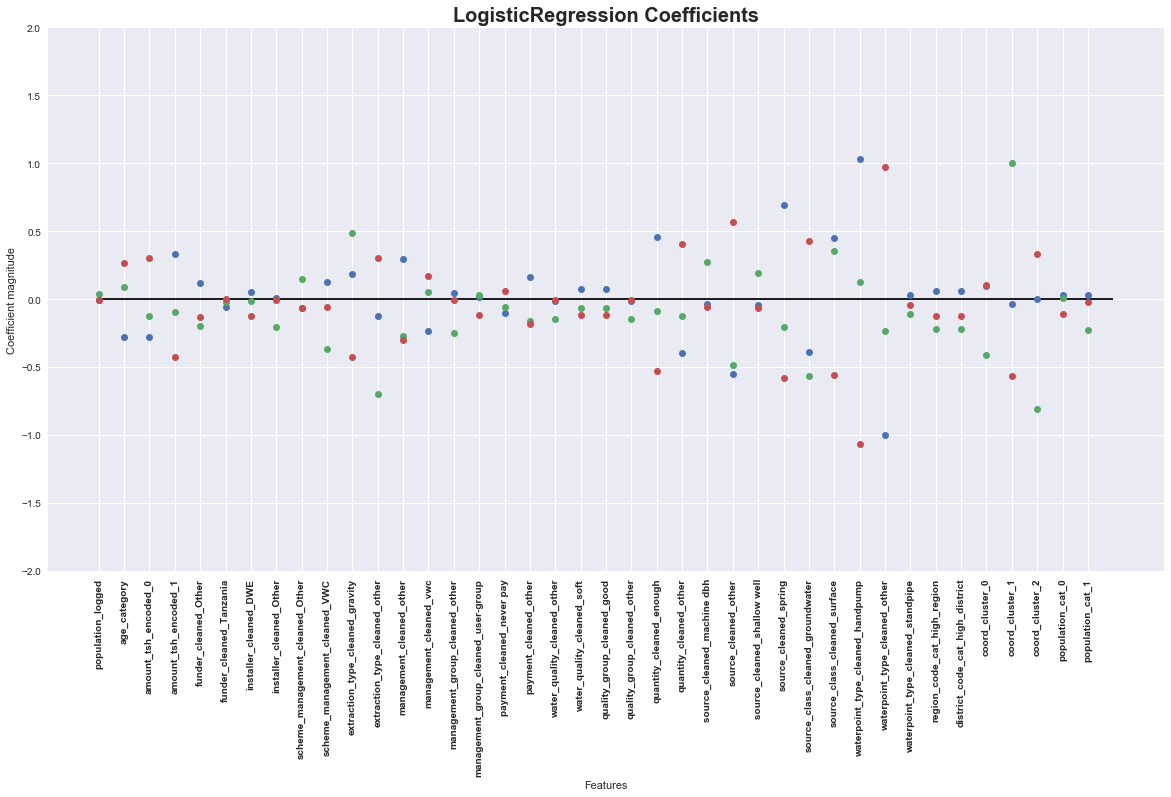

In [171]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(lr_3.coef_.T, 'o')
plt.xticks(range(X.shape[1]), X.columns, rotation=90, fontweight='bold')
plt.hlines(0, 0, X.shape[1])
plt.ylim(-2, 2)
plt.xlabel("Features")
plt.ylabel("Coefficient magnitude")
ax.set_title('LogisticRegression Coefficients', fontsize=20, fontweight='bold')


In [172]:
df_train.head()

,id,gps_height,longitude,latitude,region_code,district_code,age,population_logged,amount_tsh_encoded,funder_cleaned_Other,funder_cleaned_Tanzania,installer_cleaned_DWE,installer_cleaned_Other,scheme_management_cleaned_Other,scheme_management_cleaned_VWC,extraction_type_cleaned_gravity,extraction_type_cleaned_other,management_cleaned_other,management_cleaned_vwc,management_group_cleaned_other,management_group_cleaned_user-group,payment_cleaned_never pay,payment_cleaned_other,water_quality_cleaned_other,water_quality_cleaned_soft,quality_group_cleaned_good,quality_group_cleaned_other,quantity_cleaned_enough,quantity_cleaned_other,source_cleaned_machine dbh,source_cleaned_other,source_cleaned_shallow well,source_cleaned_spring,source_class_cleaned_groundwater,source_class_cleaned_surface,waterpoint_type_cleaned_handpump,waterpoint_type_cleaned_other,waterpoint_type_cleaned_standpipe,status_group
0,69572,1390,34.938093,-9.856322,11,5,12,4.691348,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,functional
1,8776,1399,34.698766,-2.147466,20,2,3,5.634790,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1,functional
2,34310,686,37.460664,-3.821329,21,4,4,5.521461,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,functional
3,67743,263,38.486161,-11.155298,90,63,27,4.060443,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1,non functional
4,19728,0,31.130847,-1.825359,18,1,25,0.000000,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1,functional


In [173]:
df_train['coord_cluster_0'] = df_train_3['coord_cluster_0']
df_train['coord_cluster_1'] = df_train_3['coord_cluster_1']
df_train['coord_cluster_2'] = df_train_3['coord_cluster_2']

In [174]:
df_train.head()

,id,gps_height,longitude,latitude,region_code,district_code,age,population_logged,amount_tsh_encoded,funder_cleaned_Other,funder_cleaned_Tanzania,installer_cleaned_DWE,installer_cleaned_Other,scheme_management_cleaned_Other,scheme_management_cleaned_VWC,extraction_type_cleaned_gravity,extraction_type_cleaned_other,management_cleaned_other,management_cleaned_vwc,management_group_cleaned_other,management_group_cleaned_user-group,payment_cleaned_never pay,payment_cleaned_other,water_quality_cleaned_other,water_quality_cleaned_soft,quality_group_cleaned_good,quality_group_cleaned_other,quantity_cleaned_enough,quantity_cleaned_other,source_cleaned_machine dbh,source_cleaned_other,source_cleaned_shallow well,source_cleaned_spring,source_class_cleaned_groundwater,source_class_cleaned_surface,waterpoint_type_cleaned_handpump,waterpoint_type_cleaned_other,waterpoint_type_cleaned_standpipe,status_group,coord_cluster_0,coord_cluster_1,coord_cluster_2
0,69572,1390,34.938093,-9.856322,11,5,12,4.691348,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,functional,0,0,1
1,8776,1399,34.698766,-2.147466,20,2,3,5.634790,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1,functional,1,0,0
2,34310,686,37.460664,-3.821329,21,4,4,5.521461,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,functional,1,0,0
3,67743,263,38.486161,-11.155298,90,63,27,4.060443,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1,non functional,0,0,1
4,19728,0,31.130847,-1.825359,18,1,25,0.000000,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1,functional,1,0,0


In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X = df_train.drop(['id', 'status_group'], axis=1)
y = train_labels['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf_4 = RandomForestClassifier(n_estimators=100, min_samples_leaf=3).fit(X_train, y_train)
scores_rf = cross_val_score(rf_4, X, y, cv=5) # Cross-validating the model on the whole dataset

rf_4_pred = rf_4.predict(X_test)

print("CV scores: {}".format(scores_rf))
print("CV scores mean: {}".format(scores_rf.mean()))
print()
print("Training set score: {:.2}".format(rf_4.score(X_train, y_train)))
print("Testing score: {:.2f}".format(rf_4.score(X_test, y_test)))

CV scores: [0.7851191  0.78217322 0.78291246 0.78173401 0.7790032 ]
CV scores mean: 0.7821883958599818

Training set score: 0.87
Testing score: 0.78


In [176]:
df_test['coord_cluster_0'] = df_train_3['coord_cluster_0']
df_test['coord_cluster_1'] = df_train_3['coord_cluster_1']
df_test['coord_cluster_2'] = df_train_3['coord_cluster_2']

In [177]:
df_test.head()

,id,gps_height,longitude,latitude,region_code,district_code,age,population_logged,amount_tsh_encoded,funder_cleaned_Other,funder_cleaned_Tanzania,installer_cleaned_DWE,installer_cleaned_Other,scheme_management_cleaned_Other,scheme_management_cleaned_VWC,extraction_type_cleaned_gravity,extraction_type_cleaned_other,management_cleaned_other,management_cleaned_vwc,management_group_cleaned_other,management_group_cleaned_user-group,payment_cleaned_never pay,payment_cleaned_other,water_quality_cleaned_other,water_quality_cleaned_soft,quality_group_cleaned_good,quality_group_cleaned_other,quantity_cleaned_enough,quantity_cleaned_other,source_cleaned_machine dbh,source_cleaned_other,source_cleaned_shallow well,source_cleaned_spring,source_class_cleaned_groundwater,source_class_cleaned_surface,waterpoint_type_cleaned_handpump,waterpoint_type_cleaned_other,waterpoint_type_cleaned_standpipe,coord_cluster_0,coord_cluster_1,coord_cluster_2
0,50785,1996,35.290799,-4.059696,21,3,1,5.771441,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,51630,1569,36.656709,-3.309214,2,2,13,5.703782,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0
2,17168,1567,34.767863,-5.004344,13,2,3,6.214608,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0
3,45559,267,38.058046,-9.418672,80,43,26,5.521461,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
4,49871,1260,35.006123,-10.950412,10,3,13,4.094345,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0


In [178]:
X = df_test.drop('id', axis=1)

kaggle_preds = rf_4.predict(X)

kaggle_submission_10 = pd.DataFrame({'id': df_test.id, 'status_group': kaggle_preds})

kaggle_submission_10.head()

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [179]:
kaggle_submission_10.shape

(14358, 2)

In [180]:
kaggle_submission_10.to_csv('kaggle_submission_10.csv', index=False)

In [181]:
 # y = train_labels_copy['status_group']
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X = df_train.drop(['id', 'status_group'], axis=1)
y = train_labels_copy['two_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf_4 = RandomForestClassifier(n_estimators=100, min_samples_leaf=3).fit(X_train, y_train)
scores_rf = cross_val_score(rf_4, X, y, cv=5) # Cross-validating the model on the whole dataset

rf_4_pred = rf_4.predict(X_test)

print("CV scores: {}".format(scores_rf))
print("CV scores mean: {}".format(scores_rf.mean()))
print()
print("Training set score: {:.2}".format(rf_4.score(X_train, y_train)))
print("Testing score: {:.2f}".format(rf_4.score(X_test, y_test)))

CV scores: [0.83721909 0.83518519 0.83080808 0.82853535 0.8333193 ]
CV scores mean: 0.8330134023604995

Training set score: 0.91
Testing score: 0.83


In [182]:
X = df_test.drop('id', axis=1)

kaggle_preds = rf_4.predict(X)

kaggle_submission_11 = pd.DataFrame({'id': df_test.id, 'status_group': kaggle_preds})

kaggle_submission_11.head()

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [183]:
kaggle_submission_11.to_csv('kaggle_submission_11.csv', index=False)

In [184]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, rf_4_pred)
print("Confusion Matrix:\n{}".format(confusion))

Confusion Matrix:
[[8302  870]
 [1664 4014]]


In [185]:
rf_4.classes_

array(['functional', 'non functional'], dtype=object)

In [186]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rf_4_pred,
                           target_names=['functional', 'non functional']))

                precision    recall  f1-score   support

    functional       0.83      0.91      0.87      9172
non functional       0.82      0.71      0.76      5678

     micro avg       0.83      0.83      0.83     14850
     macro avg       0.83      0.81      0.81     14850
  weighted avg       0.83      0.83      0.83     14850



In [187]:
rf_4_pred

array(['non functional', 'non functional', 'functional', ...,
       'functional', 'functional', 'non functional'], dtype=object)

In [188]:
rf_4_pred_lower_threshold = rf_4.predict_proba(X_test)[:, 1] > .3

In [189]:
rf_4_pred_lower_threshold

array([ True,  True, False, ..., False, False,  True])

In [190]:
rf_4_pred = pd.Series(rf_4_pred_lower_threshold)

In [191]:
rf_4_pred

0         True
1         True
2        False
3         True
4        False
5         True
6        False
7         True
8        False
9         True
10        True
11        True
12        True
13        True
14       False
15       False
16       False
17       False
18        True
19        True
20       False
21       False
22        True
23        True
24       False
25        True
26       False
27        True
28       False
29       False
30        True
31        True
32        True
33       False
34       False
35       False
36       False
37        True
38       False
39        True
40        True
41       False
42       False
43        True
44       False
45        True
46        True
47       False
48        True
49       False
50        True
51        True
52        True
53       False
54        True
55        True
56        True
57        True
58        True
59        True
60       False
61       False
62        True
63        True
64       False
65       False
66        

In [192]:
rf_4_pred = np.where(rf_4_pred==True, 'non functional', 'functional')

In [193]:
rf_4_pred

array(['non functional', 'non functional', 'functional', ...,
       'functional', 'functional', 'non functional'], dtype='<U14')

In [194]:
print(classification_report(y_test, rf_4_pred,
                           target_names=['functional', 'non functional']))

                precision    recall  f1-score   support

    functional       0.90      0.74      0.81      9172
non functional       0.67      0.87      0.76      5678

     micro avg       0.79      0.79      0.79     14850
     macro avg       0.79      0.80      0.78     14850
  weighted avg       0.81      0.79      0.79     14850



In [195]:
X = df_test.drop('id', axis=1)

rf_4_pred_lower_threshold = rf_4.predict_proba(X)[:, 1] > .3

rf_4_pred = pd.Series(rf_4_pred_lower_threshold)

In [196]:
rf_4_pred = np.where(rf_4_pred==True, 'non functional', 'functional')

In [197]:
kaggle_submission_12 = pd.DataFrame({'id': df_test.id, 'status_group': rf_4_pred})

kaggle_submission_12.head()

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,non functional
3,45559,non functional
4,49871,functional


In [198]:
kaggle_submission_12.to_csv('kaggle_submission_12.csv', index=False)

In [199]:
train_labels['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

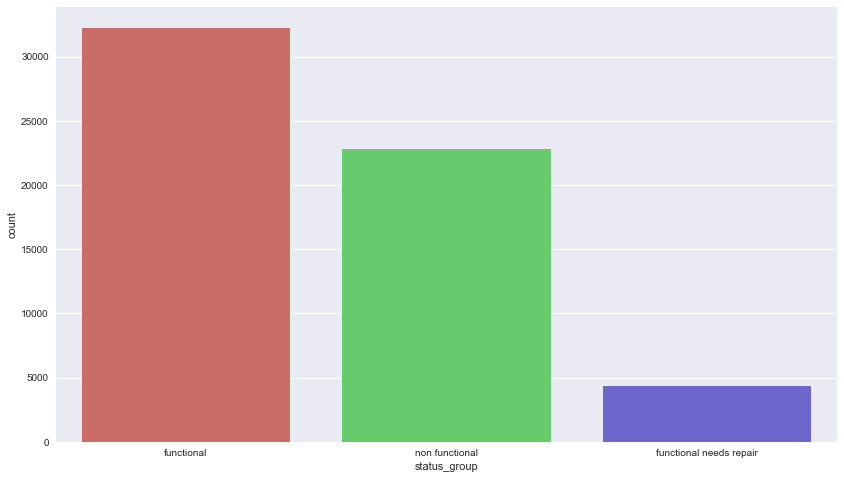

In [204]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(14, 8))
sns.countplot(x='status_group', data=train_labels, palette='hls')